In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from statsmodels.formula.api import ols
from math import exp
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import pickle

# Starting EDA

In [2]:
df = pd.read_csv('data/kc_house_data_train.csv', index_col=0)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  long  

In [5]:
#Changing date to datetime
df.date = pd.to_datetime(df.date)

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


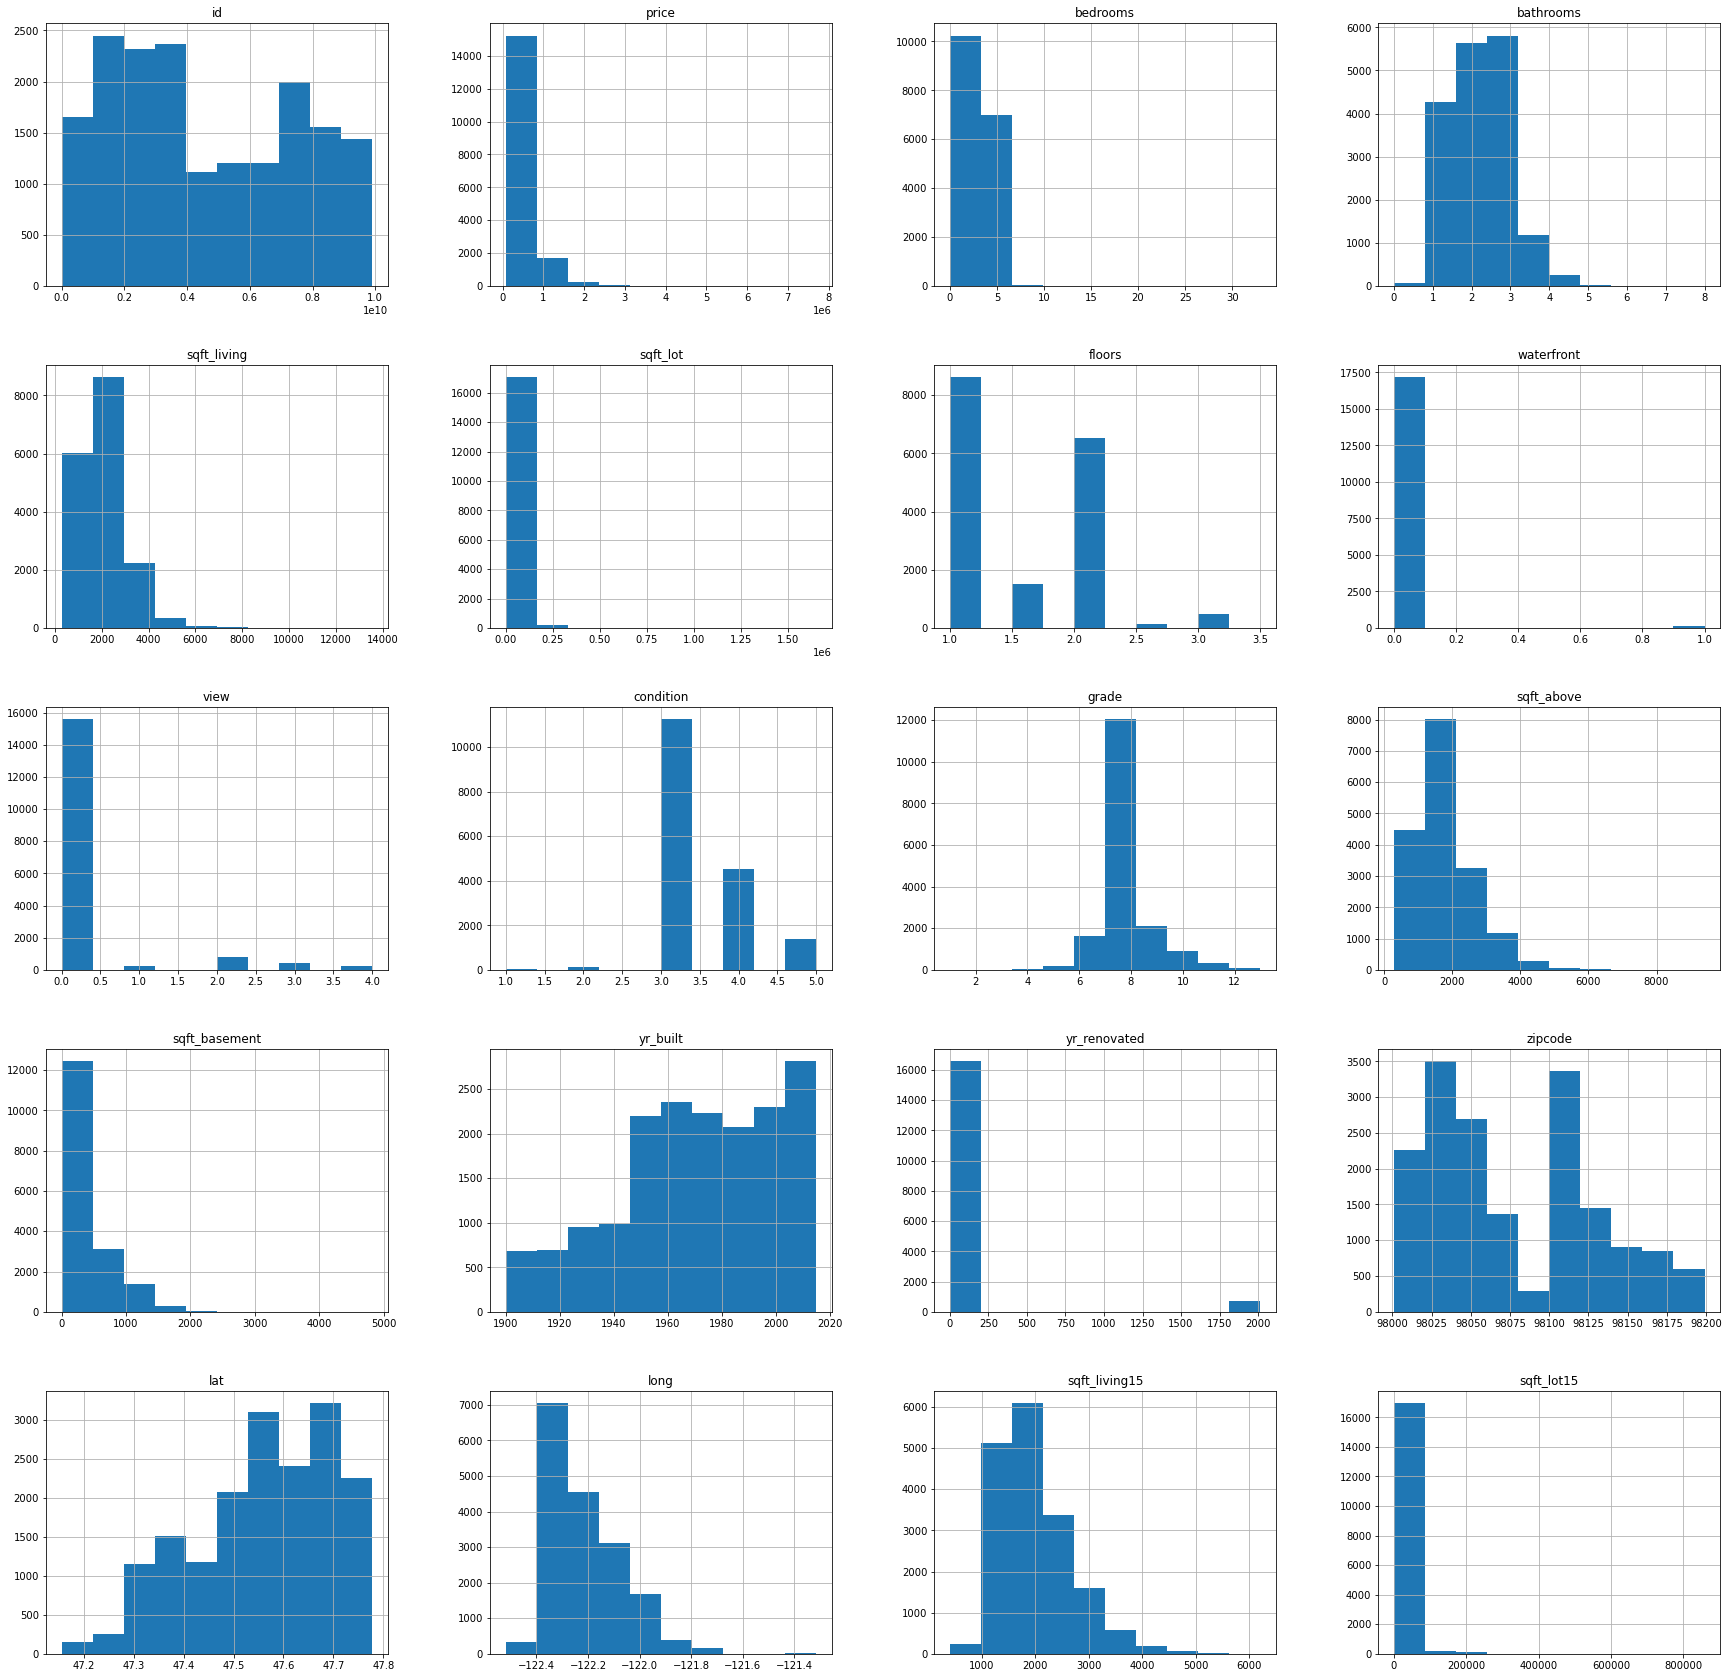

In [7]:
#Checking the distribution of the individual columns in the dataset
df.hist(figsize=(30,30));

In [8]:
#Looking for any obvious extreme values
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [9]:
#Checking to see if id is a unique identifier
df['id'].value_counts()

1232000810    2
3558900590    2
3323059027    2
3935900232    2
3630120700    2
             ..
4312700200    1
7695370160    1
2473420070    1
9842300095    1
1777500160    1
Name: id, Length: 17176, dtype: int64

In [10]:
#created a subset to look a all duplicate id entries
df[df.duplicated(subset='id',keep=False)].sort_values(['id','date'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11635,1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2885,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
12930,7200179,2014-10-16,150000.0,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969
3737,7200179,2015-04-24,175000.0,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969
3716,109200390,2014-08-20,245000.0,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956
14144,109200390,2014-10-20,250000.0,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956
6958,251300110,2014-07-31,225000.0,3,2.25,2510,12013,2.0,0,0,3,8,2510,0,1988,0,98003,47.3473,-122.314,1870,8017
1768,251300110,2015-01-14,358000.0,3,2.25,2510,12013,2.0,0,0,3,8,2510,0,1988,0,98003,47.3473,-122.314,1870,8017
4662,324000530,2014-07-08,201500.0,3,1.00,1320,5000,1.5,0,0,3,7,1320,0,1912,0,98116,47.5711,-122.386,1320,4179
10009,324000530,2015-03-23,459000.0,3,1.00,1320,5000,1.5,0,0,3,7,1320,0,1912,0,98116,47.5711,-122.386,1320,4179


#### Since the only difference in the duplicates was the price, it was most likely that the house was resold within the year. I used a 2 sample t_test of independant means to see if there was any significant difference in the mean price between first and second sales

In [11]:
df[df.duplicated(subset='id',keep='first')].price.mean(), df[df.duplicated(subset='id',keep='last')].price.mean()

(410548.5789473684, 409554.9210526316)

In [12]:
st.ttest_ind(df[df.duplicated(subset='id',keep='first')].price, df[df.duplicated(subset='id',keep='last')].price)

Ttest_indResult(statistic=0.026474180309901355, pvalue=0.9789024892115908)

#### Test showed that the difference was not significant but in the interest of preserving data, I just created a column to denote whether or not the house was resold within the year instead of dropping the row

In [13]:
df['second_sale'] = [1 if x == True else 0 for x in df.duplicated(subset='id', keep='last')]

In [14]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824,0.006593
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583,0.080934
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,0.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000,0.000000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000,0.000000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000,1.000000


In [15]:
#Dropped the id column as it was not unique and would not add to the EDA
df = df.sort_values('date').reset_index().drop(['index','id'], axis=1)

In [16]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale
0,2014-05-02,257950.0,3,1.75,1370,5858,1.0,0,0,3,7,1370,0,1987,0,98198,47.3815,-122.313,1400,7500,0
1,2014-05-02,439950.0,3,2.50,1770,2875,2.0,0,0,3,8,1770,0,1990,0,98116,47.5631,-122.397,1770,3833,0
2,2014-05-02,287200.0,3,3.00,1850,19966,1.0,0,0,4,7,1090,760,1992,0,98038,47.3493,-122.034,1410,6715,0
3,2014-05-02,260000.0,4,2.00,1480,8625,1.0,0,0,4,7,1480,0,1974,0,98055,47.4620,-122.193,2130,8502,0
4,2014-05-02,459990.0,3,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4761,-121.734,2990,6037,0


In [17]:
df.groupby('bathrooms').size()

bathrooms
0.00       8
0.50       3
0.75      52
1.00    3100
1.25       6
1.50    1168
1.75    2431
2.00    1549
2.25    1666
2.50    4322
2.75     896
3.00     592
3.25     455
3.50     591
3.75     135
4.00     107
4.25      64
4.50      76
4.75      16
5.00      17
5.25      11
5.50       7
5.75       3
6.00       6
6.25       2
6.50       1
6.75       2
7.50       1
7.75       1
8.00       2
dtype: int64

#### After checking to see the the amount of rows which contained the same bathroom count, I decided to consolidated the amount of bathroom catagories to that had a low amount of sample points which would not be helpful in testing

In [18]:
df['bathrooms'] = [1 if x <= 1.25 else (4 if x >=4 else x) for x in df.bathrooms]

In [19]:
df[df['bedrooms']==33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale
2809,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,0


In [20]:
#Looked like an obvious typo so changed the number of bedrooms from 33 to 3
df.loc[2809,'bedrooms'] = 3

In [21]:
df.groupby('bedrooms').size()

bedrooms
0       12
1      160
2     2204
3     7865
4     5488
5     1283
6      229
7       30
8       10
9        5
10       3
11       1
dtype: int64

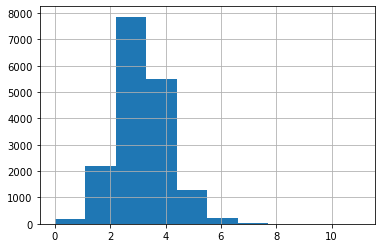

In [22]:
df.bedrooms.hist();

In [23]:
df[df['bedrooms']==0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale
2097,2014-06-12,1095000.0,0,1.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,0
2757,2014-06-24,1295650.0,0,1.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,0
5123,2014-08-05,288000.0,0,1.5,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650,0
7669,2014-09-25,240000.0,0,2.5,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685,0
7720,2014-09-26,142000.0,0,1.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850,0
8007,2014-10-02,228000.0,0,1.0,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000,0
9214,2014-10-29,265000.0,0,1.0,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341,0
10064,2014-11-17,339950.0,0,2.5,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751,0
11500,2014-12-23,235000.0,0,1.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,0
12654,2015-02-05,380000.0,0,1.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,0


In [24]:
df[(df['sqft_living'] > 3000)&(df['sqft_living']<5000)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale
11,2014-05-02,367500.0,4,3.00,3110,7231,2.0,0,0,3,8,3110,0,1997,0,98092,47.3279,-122.191,2820,7311,0
14,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,98119,47.6345,-122.367,2880,5400,0
20,2014-05-02,604000.0,3,2.50,3240,33151,2.0,0,2,3,10,3240,0,1995,0,98023,47.3256,-122.378,4050,24967,0
28,2014-05-02,400000.0,4,2.50,3630,42884,1.5,0,0,3,9,2300,1330,1979,0,98092,47.2617,-122.190,2830,80148,0
35,2014-05-02,838000.0,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,98052,47.7232,-122.131,3350,42847,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17260,2015-05-13,724500.0,3,3.25,3240,4185,2.0,0,0,3,8,2770,470,2011,0,98075,47.5794,-122.030,2660,4692,0
17273,2015-05-13,425000.0,3,2.75,3370,13929,2.0,0,0,3,9,2650,720,1986,0,98092,47.3411,-122.197,2150,14048,0
17282,2015-05-14,479349.0,5,3.00,3223,6371,2.0,0,0,3,9,3223,0,2014,0,98042,47.3584,-122.163,1979,9008,0
17286,2015-05-14,1695000.0,5,3.00,3320,5354,2.0,0,0,3,9,3320,0,2004,0,98103,47.6542,-122.331,2330,4040,0


#### As with bathrooms, I checked the sample size of each value for bedroom, and am going to consolidated the lowest sizes with the values that have over 100 samples. For 2 specific points, I looked at the amount of sqft_living and input the median amount of bedrooms, for a range between 3000-5000 sqft to those points.

In [25]:
df.loc[2097,'bedrooms'] = 3
df.loc[2757,'bedrooms'] = 3

In [26]:
df['bedrooms'] = [6 if x >=6 else x for x in df.bedrooms]

In [27]:
#Grouping the sample by month sold to look for seasonality in sales 
df.groupby(pd.Grouper(key='date', freq='M')).mean().price


date
2014-05-31    550740.787070
2014-06-30    561750.456361
2014-07-31    545195.457694
2014-08-31    539761.679052
2014-09-30    526573.607349
2014-10-31    540855.801072
2014-11-30    528512.076256
2014-12-31    526432.541880
2015-01-31    515932.273990
2015-02-28    508686.988889
2015-03-31    537872.878342
2015-04-30    561916.902993
2015-05-31    561369.578218
Freq: M, Name: price, dtype: float64

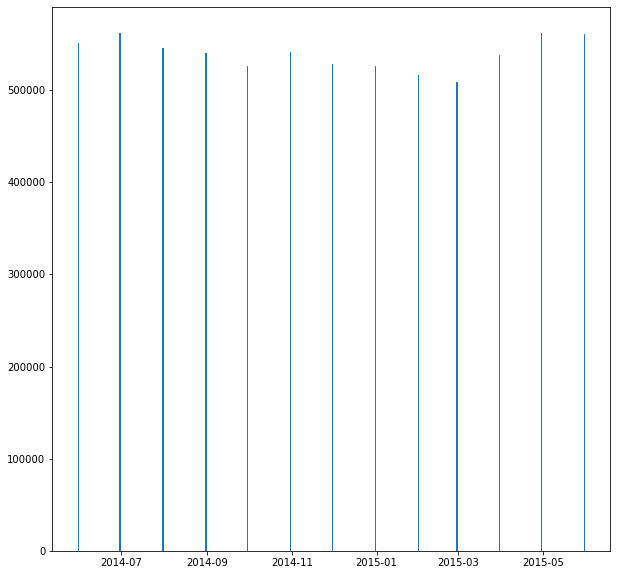

In [28]:
#create a graph of mean price per month 
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x=df.groupby(pd.Grouper(key='date', freq='M')).mean().price.index, height =df.groupby(pd.Grouper(key='date', freq='M')).mean().price);

In [29]:
#looking at the amount of houses sold per month
df.groupby(pd.Grouper(key='date', freq='M')).size()

date
2014-05-31    1423
2014-06-30    1753
2014-07-31    1761
2014-08-31    1561
2014-09-30    1388
2014-10-31    1493
2014-11-30    1154
2014-12-31    1170
2015-01-31     792
2015-02-28     990
2015-03-31    1496
2015-04-30    1804
2015-05-31     505
Freq: M, dtype: int64

In [30]:
#Using an ANOVA test to see if there is any significant difference in price between the months
st.f_oneway(df[df['date'] <= pd.to_datetime('2014-05-31')].price,
           df[(df['date'] >= pd.to_datetime('2014-06-01')) & (df['date'] <= pd.to_datetime('2014-06-30'))].price,
           df[(df['date'] >= pd.to_datetime('2014-07-01')) & (df['date'] <= pd.to_datetime('2014-07-31'))].price,
           df[(df['date'] >= pd.to_datetime('2014-08-01')) & (df['date'] <= pd.to_datetime('2014-08-31'))].price,
           df[(df['date'] >= pd.to_datetime('2014-09-01')) & (df['date'] <= pd.to_datetime('2014-09-30'))].price,
           df[(df['date'] >= pd.to_datetime('2014-10-01')) & (df['date'] <= pd.to_datetime('2014-10-31'))].price,
           df[(df['date'] >= pd.to_datetime('2014-11-01')) & (df['date'] <= pd.to_datetime('2014-11-30'))].price,
           df[(df['date'] >= pd.to_datetime('2014-12-01')) & (df['date'] <= pd.to_datetime('2014-12-31'))].price,
           df[(df['date'] >= pd.to_datetime('2015-01-01')) & (df['date'] <= pd.to_datetime('2015-01-31'))].price,
           df[(df['date'] >= pd.to_datetime('2015-02-01')) & (df['date'] <= pd.to_datetime('2015-02-28'))].price,
           df[(df['date'] >= pd.to_datetime('2015-03-01')) & (df['date'] <= pd.to_datetime('2015-03-31'))].price,
           df[(df['date'] >= pd.to_datetime('2015-04-01')) & (df['date'] <= pd.to_datetime('2015-04-30'))].price,
           df[df['date'] >= pd.to_datetime('2015-05-01')].price)

F_onewayResult(statistic=2.504409911324381, pvalue=0.0027582725637271487)

#### With the P > value under .05, I concluded that there is a difference in price between the months

In [31]:
#Testing the see if there is a significant difference in price between house on and off a waterfront
st.ttest_ind(df[df['waterfront']==0].price, df[df['waterfront']==1].price)

Ttest_indResult(statistic=-37.72330429549608, pvalue=2.465038317654299e-299)

In [32]:
#P_value < .05 signifies a significant difference and checking to the actual difference
df[df['waterfront']==0].price.mean(), df[df['waterfront']==1].price.mean()

(531505.1133395522, 1688486.1739130435)

In [33]:
df[df['waterfront']==0].price.size, df[df['waterfront']==1].price.size

(17152, 138)

#### Created a new column denoting houses that have and haven't been renovated and testing the see if there is a significant difference in price

In [34]:
df['is_renovated'] = [0 if x == 0 else 1 for x in df.yr_renovated]

In [35]:
st.ttest_ind(df[df['is_renovated']==0].price, df[df['is_renovated']==1].price)

Ttest_indResult(statistic=-15.544856792041145, pvalue=4.007705820364685e-54)

In [36]:
df[df['is_renovated']==0].price.mean(), df[df['is_renovated']==1].price.mean()

(531563.548659744, 750093.9063360882)

In [37]:
#created a column to show the age of the house
df['house_age'] = [2015 - x for x in df.yr_built]

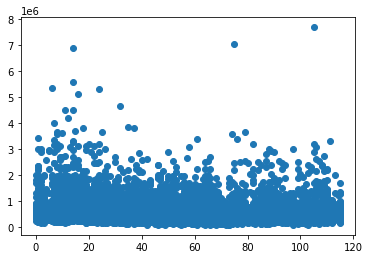

In [38]:
fig, ax = plt.subplots()
ax.scatter(x = df.house_age, y = df.price);

#### Created and tested a column to see if there is a difference in price between houses with and whitout a basement

In [39]:
df['has_basement'] = [0 if x == 0 else 1 for x in df.sqft_basement]

In [40]:
st.ttest_ind(df[df['has_basement']==0].price, df[df['has_basement']==1].price)

Ttest_indResult(statistic=-23.641892563316105, pvalue=1.2107663322174255e-121)

In [41]:
df[df['has_basement']==0].price.mean(), df[df['has_basement']==1].price.mean()

(487510.2989317055, 622734.1789597414)

In [42]:
df.has_basement.sum()

6806

#### Grouped the samples by zipcode the see is there are zipcodes which stand out in price

In [43]:
df.groupby('zipcode').mean().price.sort_values(ascending=False)

zipcode
98039    2.202790e+06
98004    1.396883e+06
98040    1.183018e+06
98112    1.119458e+06
98102    9.336715e+05
98109    8.759879e+05
98119    8.712724e+05
98105    8.687880e+05
98006    8.494588e+05
98005    8.088476e+05
98033    8.027175e+05
98075    7.939692e+05
98199    7.871469e+05
98074    6.912549e+05
98053    6.773342e+05
98077    6.768898e+05
98177    6.552490e+05
98052    6.460591e+05
98008    6.407492e+05
98144    6.213533e+05
98122    6.192377e+05
98029    6.156723e+05
98116    6.150221e+05
98115    6.137439e+05
98027    6.072946e+05
98007    5.975536e+05
98024    5.909915e+05
98103    5.897893e+05
98107    5.834824e+05
98117    5.701880e+05
98072    5.667307e+05
98136    5.659156e+05
98065    5.272174e+05
98034    5.238643e+05
98070    4.956727e+05
98059    4.943730e+05
98011    4.906393e+05
98166    4.793758e+05
98125    4.752226e+05
98028    4.684170e+05
98014    4.562057e+05
98045    4.313185e+05
98019    4.284222e+05
98126    4.250761e+05
98010    4.248736e+05
98

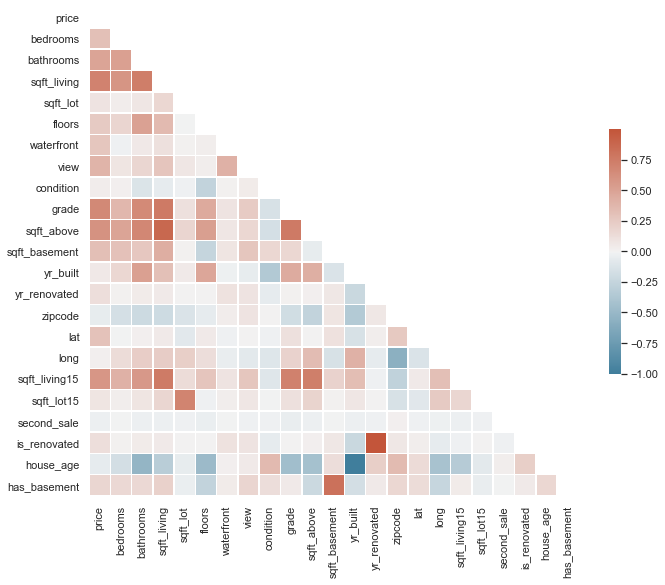

In [44]:
#created a heatmap to visually check for correlation between price and features, 
#and multicollinearity between features and other features
sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

#### Removed the day from the date column to be able to work with it easier

In [45]:
df.date[0].strftime('%Y-%m')

'2014-05'

In [46]:
df['date'] = [x.strftime('%Y-%m') for x in df.date]

In [47]:
df['date'] = pd.to_datetime(df.date)

In [48]:
type(df.date[0])

pandas._libs.tslibs.timestamps.Timestamp

#### Created a season column to see if there was a better relationship between time of year and sales that wasn't captured as well when only grouped by months

In [49]:
df['season'] = ['Winter' if int(x.strftime('%m')) in list([1,2,12]) 
                else ('Spring' if int(x.strftime('%m')) in range(3,6)
                else ('Summer' if int(x.strftime('%m')) in range(6,9)
                else 'Fall')) for x in df.date]


In [50]:
df.groupby('season').mean().price

season
Fall      532412.593309
Spring    551941.793420
Summer    549242.508768
Winter    517664.144309
Name: price, dtype: float64

### Ran a linear regression model with zipcodes a catagorical feature look for zipcodes with little to no significance

In [51]:
ols(formula='price~C(zipcode)', data= df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     167.4
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:28:34   Log-Likelihood:            -2.4193e+05
No. Observations:               17290   AIC:                         4.840e+05
Df Residuals:                   17220   BIC:                         4.845e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             2.82e+05   1.72e+04     16.421      0.000    2.48e+05    3.16e+05
C(zipcode)[T.98002] -4.971e+04   2.88e+04     -1.727      0.084   -1.06e+05    6701.740
C(zipcode)[T.98003]  8763.9215   2.59e+04      0.339      0.735   -4.19e+04    5.95e+04
C(zipcode)[T.98004]  1.115e+06   2.55e+04     43.787      0.000    1.06e+06    1.16e+06
C(zipcode)[T.98005]  5.268e+05   2.99e+04     17.629      0.000    4.68e+05    5.85e+05
C(zipcode)[T.98006]  5.675e+05   2.26e+04     25.068      0.000    5.23e+05    6.12e+05
C(zipcode)[T.98007]  3.156e+05   3.13e+04     10.073      0.000    2.54e+05    3.77e+05
C(zipcode)[T.98008]  3.588e+05   2.58e+04     13.907      0.000    3.08e+05    4.09e+05
C(zipcode)[T.98010]  1.429e+05   3.78e+04      3.783      0.000    6.88e+04    2.17e+05
C(zipcode)[T.98011]  2.086e+05   2.84e+04      7.337      0.000    1.53e+05    2.64e+05
C(zipcode)[T.98014]  1.742e+05   3.35e+04      5.196      0.000    1.08e+05     2.4e+05
C(zipcode)[T.98019]  1.464e+05   2.95e+04      4.957      0.000    8.85e+04    2.04e+05
C(zipcode)[T.98022]  2.677e+04   2.72e+04      0.985      0.324   -2.65e+04       8e+04
C(zipcode)[T.98023]  7573.8820   2.23e+04      0.339      0.735   -3.62e+04    5.14e+04
C(zipcode)[T.98024]   3.09e+05   3.98e+04      7.765      0.000    2.31e+05    3.87e+05
C(zipcode)[T.98027]  3.253e+05   2.34e+04     13.907      0.000    2.79e+05    3.71e+05
C(zipcode)[T.98028]  1.864e+05    2.6e+04      7.163      0.000    1.35e+05    2.37e+05
C(zipcode)[T.98029]  3.337e+05   2.51e+04     13.295      0.000    2.84e+05    3.83e+05
C(zipcode)[T.98030]   1.44e+04   2.67e+04      0.540      0.589   -3.79e+04    6.67e+04
C(zipcode)[T.98031]   1.86e+04   2.62e+04      0.711      0.477   -3.27e+04    6.99e+04
C(zipcode)[T.98032]  -3.04e+04   3.33e+04     -0.913      0.361   -9.56e+04    3.48e+04
C(zipcode)[T.98033]  5.207e+05    2.3e+04     22.601      0.000    4.76e+05    5.66e+05
C(zipcode)[T.98034]  2.419e+05   2.21e+04     10.955      0.000    1.99e+05    2.85e+05
C(zipcode)[T.98038]  8.642e+04   2.19e+04      3.949      0.000    4.35e+04    1.29e+05
C(zipcode)[T.98039]  1.921e+06   4.78e+04     40.147      0.000    1.83e+06    2.01e+06
C(zipcode)[T.98040]   9.01e+05   2.57e+04     35.055      0.000    8.51e+05    9.51e+05
C(zipcode)[T.98042]  2.717e+04   2.22e+04      1.224      0.221   -1.63e+04    7.07e+04
C(zipcode)[T.98045]  1.493e+05   2.78e+04      5.378      0.000    9.49e+04    2.04e+05
C(zipcode)[T.98052]  3.641e+05   2.17e+04     16.764      0.000    3.21e+05    4.07e+05
C(zipcode)[T.98053]  3.953e+05   2.35e+04     16.805      0.000    3.49e+05    4.41e+05
C(zipcode)[T.98055]  2.485e+04   2.63e+04      0.944      0.345   -2.68e+04    7.65e+04
C(zipcode)[T.98056]  1.415e+05   2.33e+04      6.066      0.000    9.58e+04    1.87e+05
C(z

In [52]:
#Created a column to account for space that was not part of the house and
#changed any negative values to zero
df['yard_space'] = df.sqft_lot - (df.sqft_living / df.floors)
df['yard_space'] = [0 if x < 0 else x for x in df.yard_space]

In [53]:

df[df['yard_space'] == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,is_renovated,house_age,has_basement,season,yard_space
1431,2014-06-01,610000.0,5,2.5,3990,3839,1.0,0,0,4,8,1990,2000,1962,0,98112,47.6236,-122.299,2090,5000,0,0,53,1,Summer,0.0
3797,2014-07-01,370000.0,3,1.0,1170,1105,1.0,0,0,3,7,1170,0,1965,0,98126,47.5448,-122.375,1380,1399,0,0,50,0,Summer,0.0
4916,2014-07-01,450000.0,3,2.5,1530,762,2.0,0,0,3,8,1050,480,2007,0,98119,47.6420,-122.374,1610,1482,0,0,8,1,Summer,0.0
10849,2014-12-01,760000.0,3,2.0,1780,1750,1.0,0,2,3,8,1400,380,1927,2014,98103,47.6797,-122.357,1780,3750,0,1,88,1,Winter,0.0


In [54]:
df.corr().price.yard_space

0.08025239187092187

In [55]:
df.yard_space.describe()

count    1.729000e+04
mean     1.375375e+04
std      4.221746e+04
min      0.000000e+00
25%      3.805250e+03
50%      6.157500e+03
75%      9.096000e+03
max      1.650059e+06
Name: yard_space, dtype: float64

In [56]:
df.groupby('grade').size()

grade
1        1
3        2
4       22
5      192
6     1648
7     7183
8     4848
9     2099
10     893
11     319
12      72
13      11
dtype: int64

#### Consolidated categories according to sample size, if it had under 100 samples

In [57]:
df['grade'] = [5 if x <= 5 else (11 if x >=11 else x) for x in df.grade]

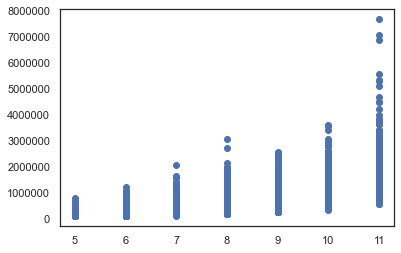

In [58]:
fig, ax = plt.subplots()
ax.scatter(df.grade, df.price)
ax.ticklabel_format(useOffset=False)
ax.ticklabel_format(style='plain');

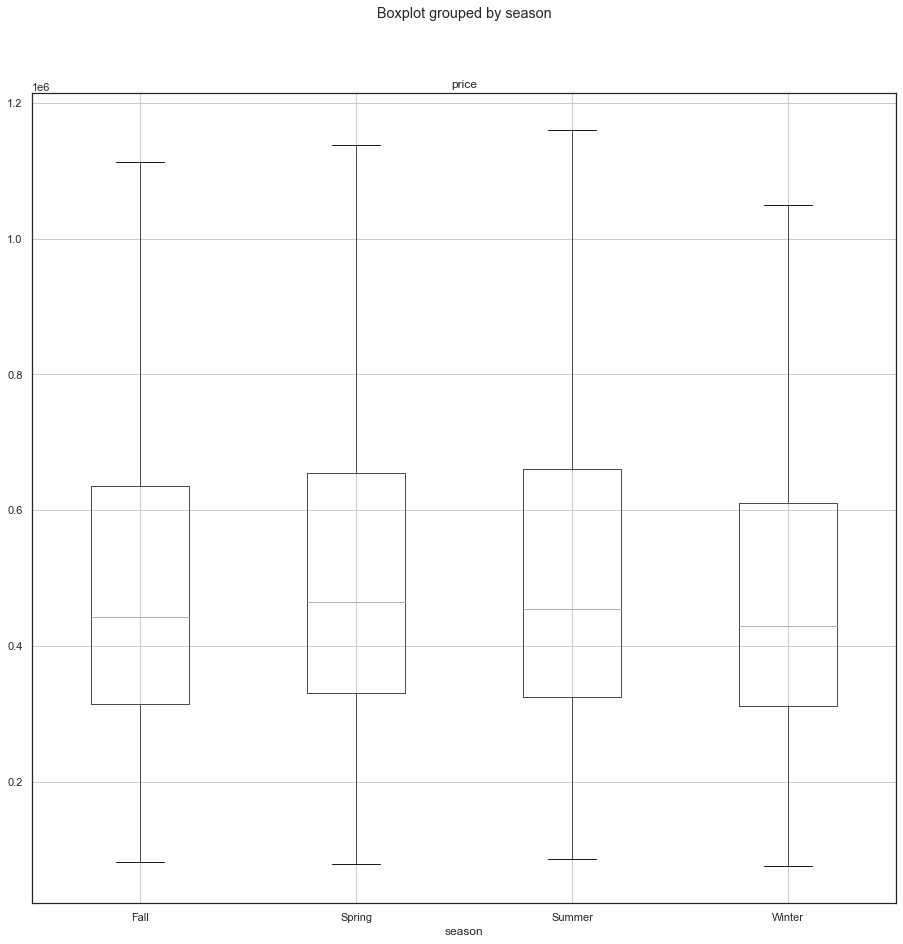

In [59]:
df.boxplot(column='price', by='season', figsize = (15,15), showfliers = False);

In [60]:
df.columns.size

26

#### Created a few more columns to see if i could tease out a relationship that is not obvious

In [61]:
df['sqft_per_floor'] = df['sqft_living']/df['floors']
df['floor_area_lot_ratio'] = df['sqft_per_floor']/df['sqft_lot']
df['living_bathroom_ratio'] = df.sqft_living/df.bathrooms
df['living_bedroom_ratio'] = df.sqft_living/df.bedrooms

In [62]:
#Since some values were divided by zero in the equations above, I had to replace the infinite 
#values with zeros
df.replace(np.inf, 0, inplace=True)

In [63]:
df['sqft_living_log'] = [np.log(x) for x in df.sqft_living]

In [64]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,is_renovated,house_age,has_basement,season,yard_space,sqft_per_floor,floor_area_lot_ratio,living_bathroom_ratio,living_bedroom_ratio,sqft_living_log
0,2014-05-01,257950.0,3,1.75,1370,5858,1.0,0,0,3,7,1370,0,1987,0,98198,47.3815,-122.313,1400,7500,0,0,28,0,Spring,4488.0,1370.0,0.233868,782.857143,456.666667,7.222566
1,2014-05-01,439950.0,3,2.50,1770,2875,2.0,0,0,3,8,1770,0,1990,0,98116,47.5631,-122.397,1770,3833,0,0,25,0,Spring,1990.0,885.0,0.307826,708.000000,590.000000,7.478735
2,2014-05-01,287200.0,3,3.00,1850,19966,1.0,0,0,4,7,1090,760,1992,0,98038,47.3493,-122.034,1410,6715,0,0,23,1,Spring,18116.0,1850.0,0.092658,616.666667,616.666667,7.522941
3,2014-05-01,260000.0,4,2.00,1480,8625,1.0,0,0,4,7,1480,0,1974,0,98055,47.4620,-122.193,2130,8502,0,0,41,0,Spring,7145.0,1480.0,0.171594,740.000000,370.000000,7.299797
4,2014-05-01,459990.0,3,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4761,-121.734,2990,6037,0,0,2,0,Spring,4199.0,1340.0,0.241921,1072.000000,893.333333,7.893572


In [65]:
ols(formula='price~sqft_per_floor', data= df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     4000.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:28:35   Log-Likelihood:            -2.4457e+05
No. Observations:               17290   AIC:                         4.891e+05
Df Residuals:                   17288   BIC:                         4.892e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.73e+05   6352.907     27.231      0.000    1.61e+05    1.85e+05
sqft_per_floor   246.8642      3.904     63.242      0.000     239.213     254.515
==============================================================================
Omnibus:                    14450.524   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           821696.039
Skew:                           3.672   Prob(JB):                         0.00
Kurtosis:                      35.964   Cond. No.                     4.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### In the next few cells, I graph to see any relationships that aren't obvious in numbers

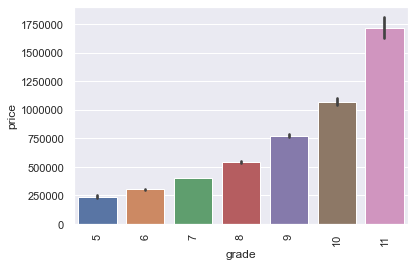

In [66]:
sns.set_style('darkgrid')
x = df['grade']
y = df['price']
fig, ax = plt.subplots()
ax = sns.barplot(x=x,y=y, data=df)
ax.ticklabel_format(style='plain', axis='y')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()


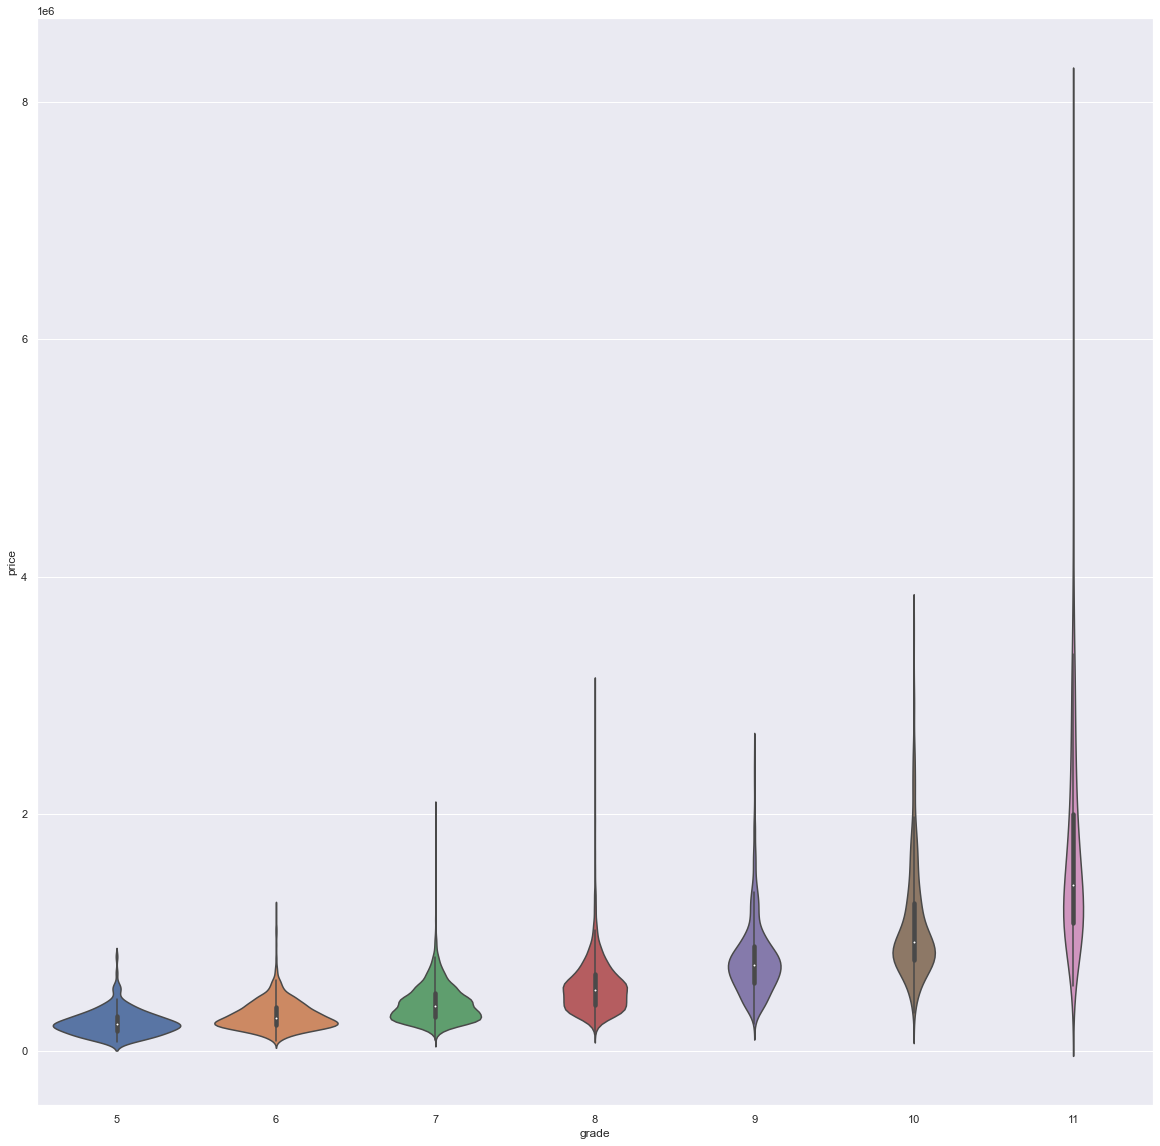

In [67]:
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.violinplot(x=df.grade, y=df.price, data=df)
plt.show();

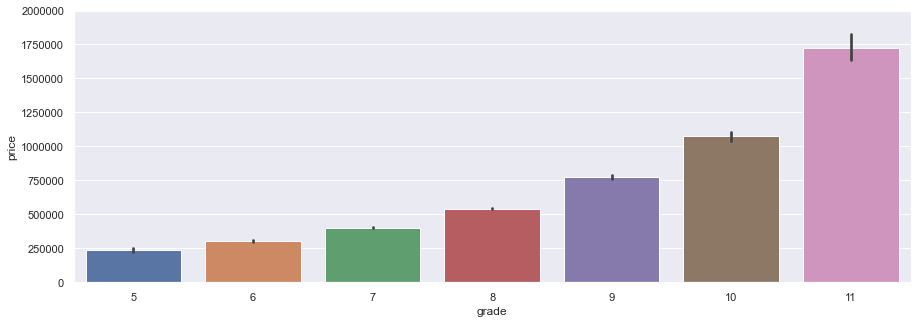

In [68]:
#df.groupby('grade').agg(['mean','median']).price
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x=df.grade, y=df.price, data=df)
ax.ticklabel_format(style='plain', axis='y')
plt.ylim(top=2000000);

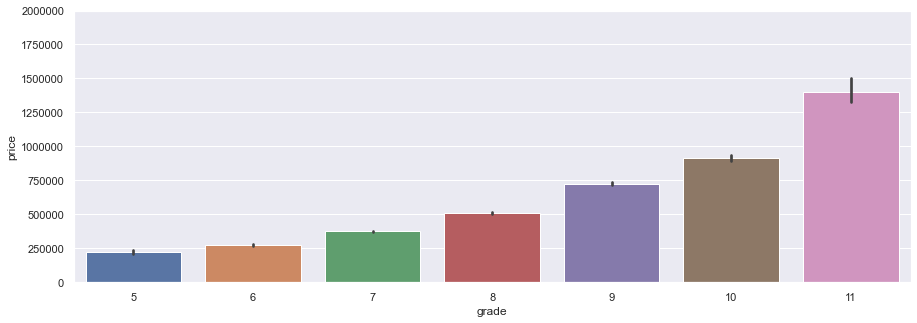

In [69]:
fig, ax = plt.subplots(figsize=(15,5))
ax= sns.barplot(x=df.grade, y=df.price, data=df, estimator=np.median)
ax.ticklabel_format(style='plain', axis='y')
plt.ylim(top=2000000);

<ipython-input-70-db3633cb2e2d>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10,10))


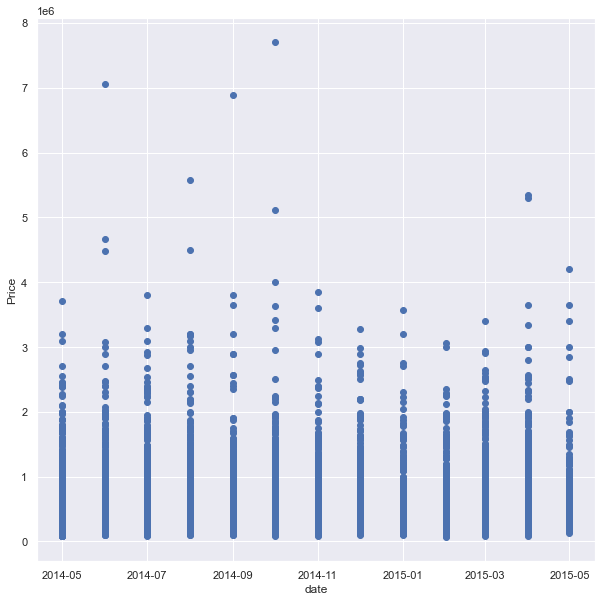

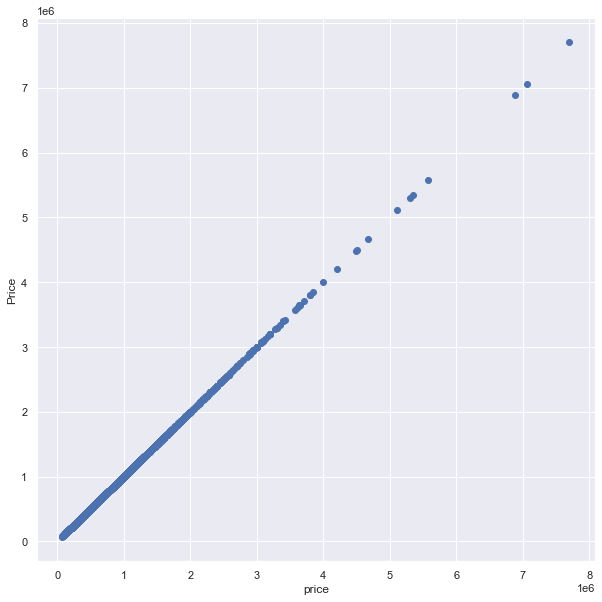

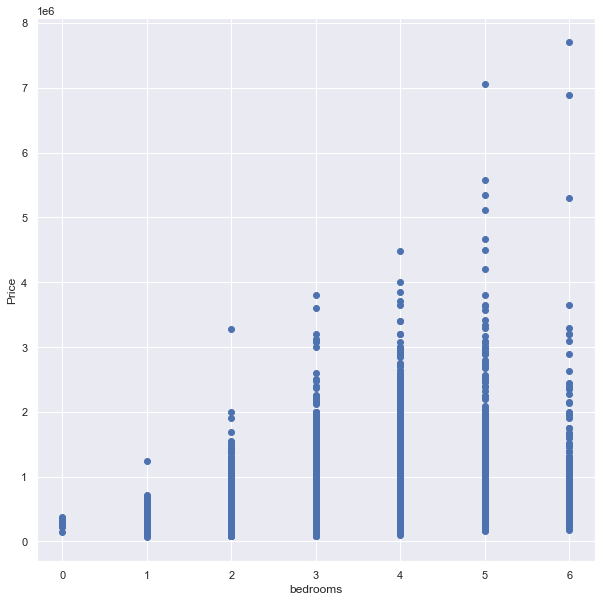

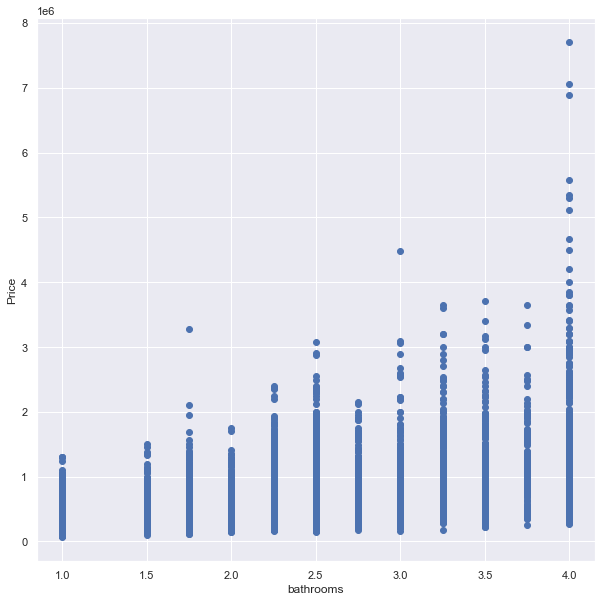

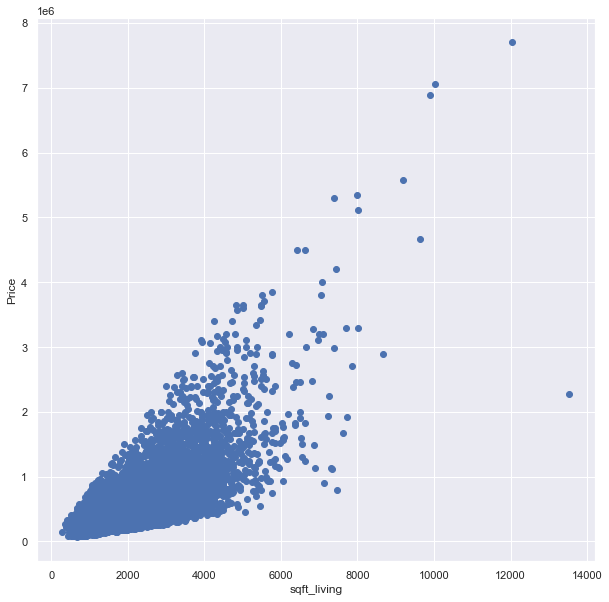

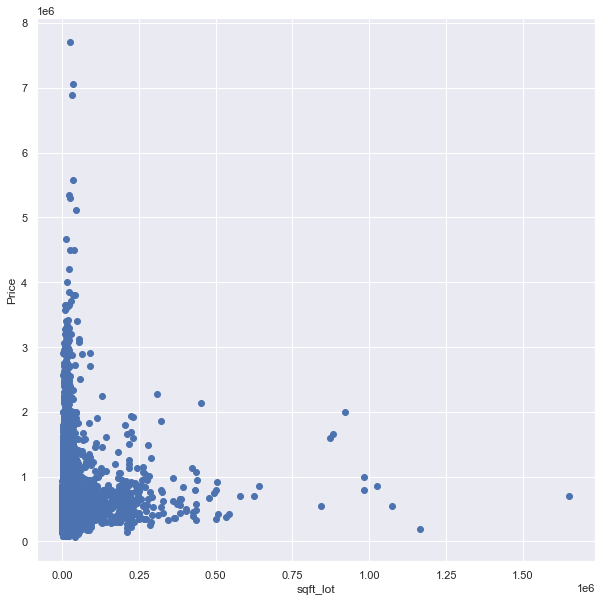

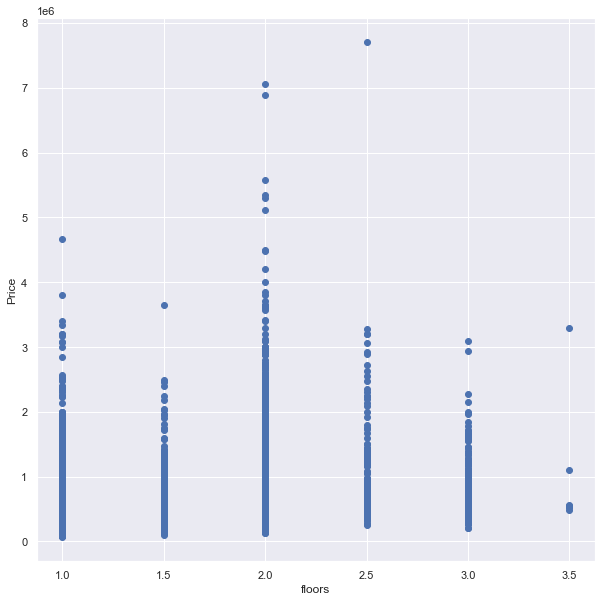

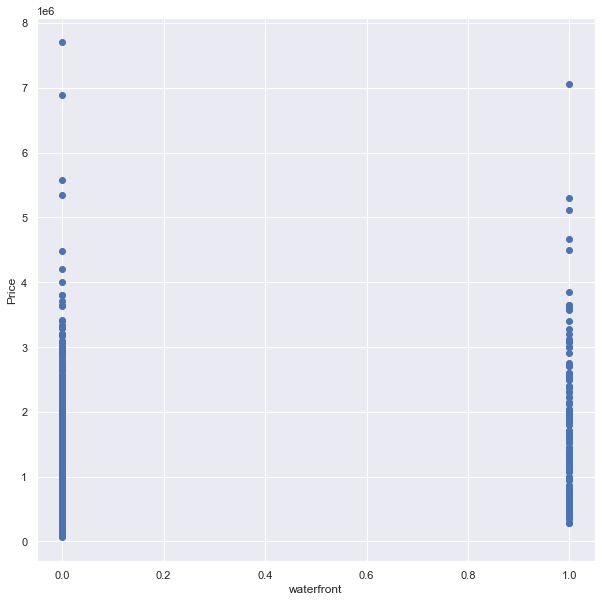

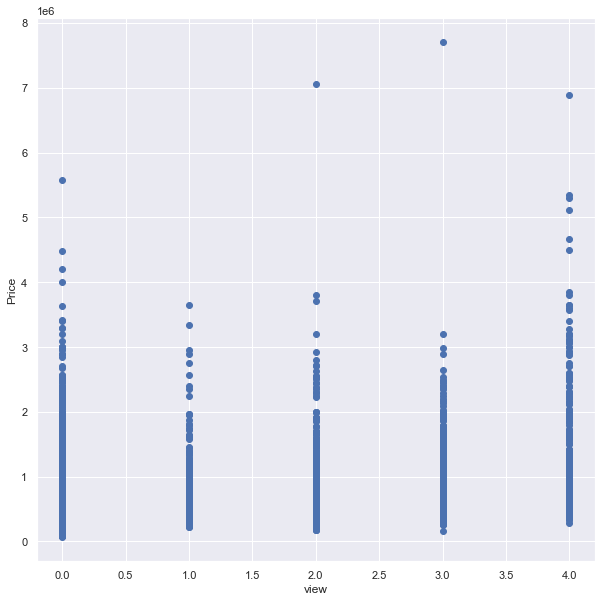

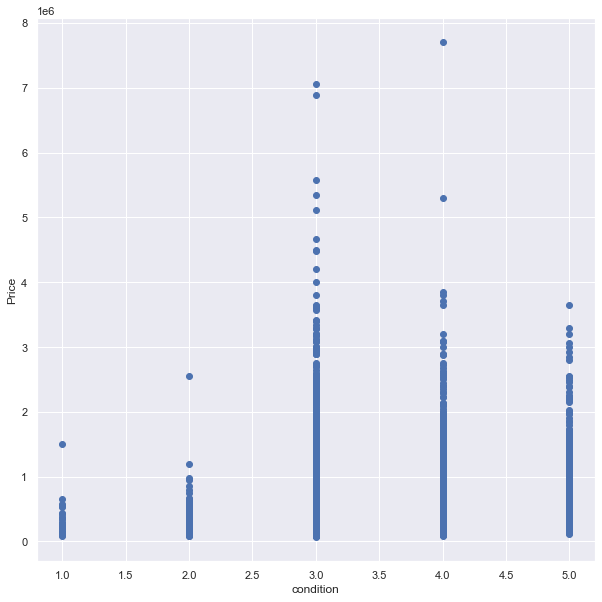

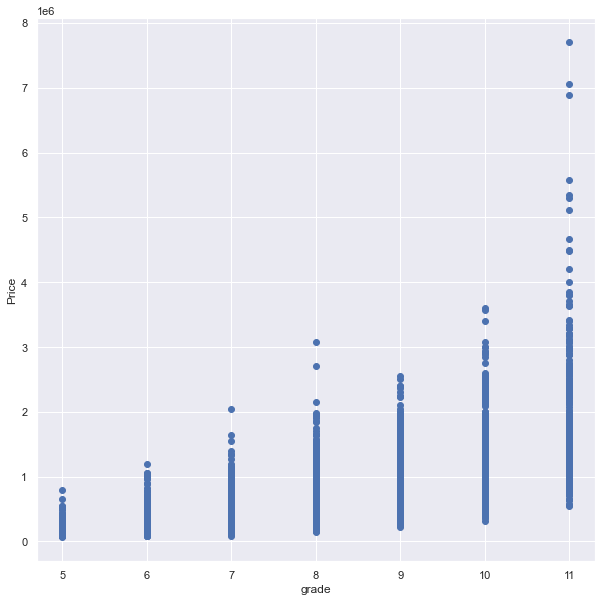

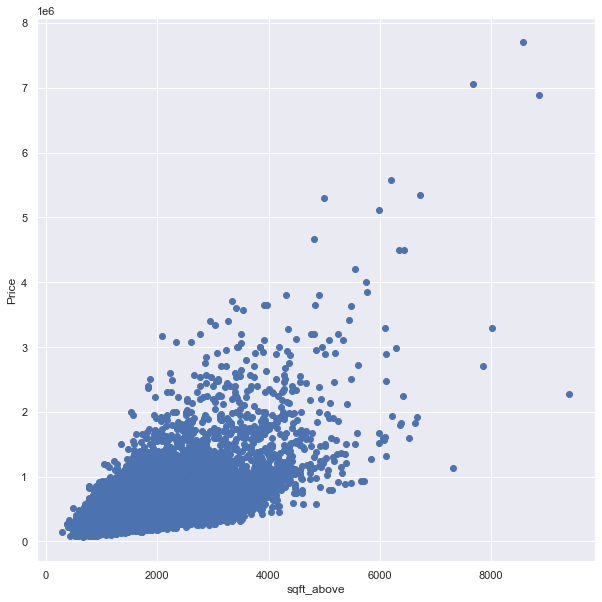

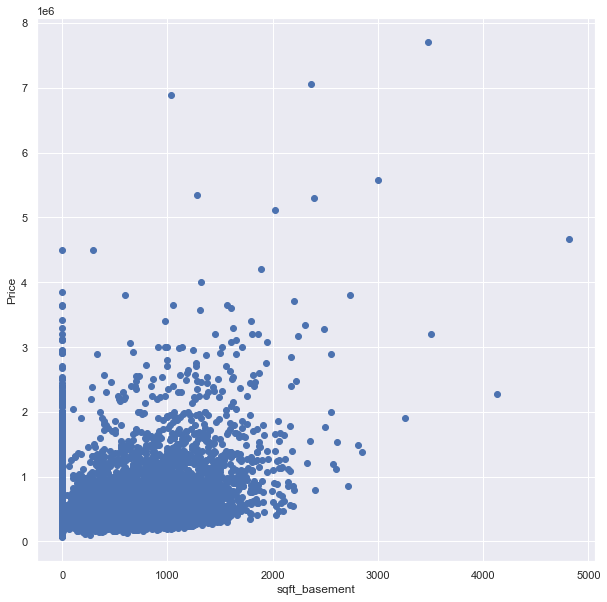

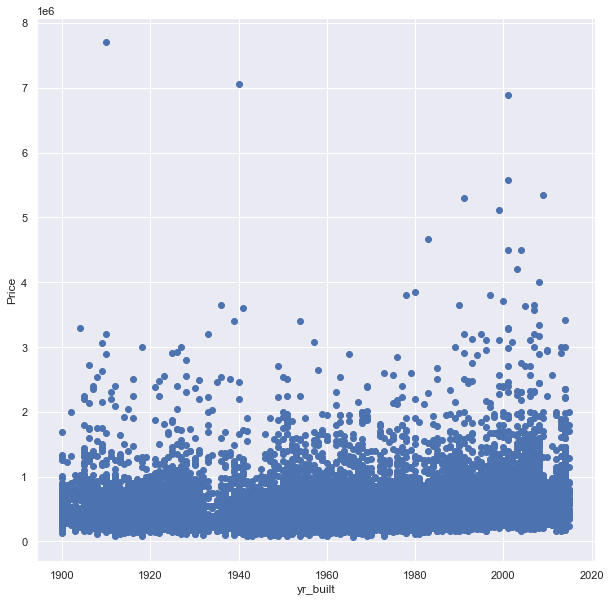

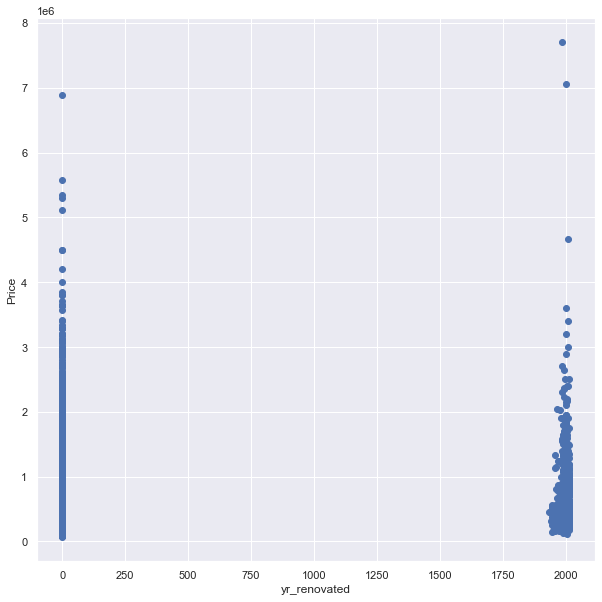

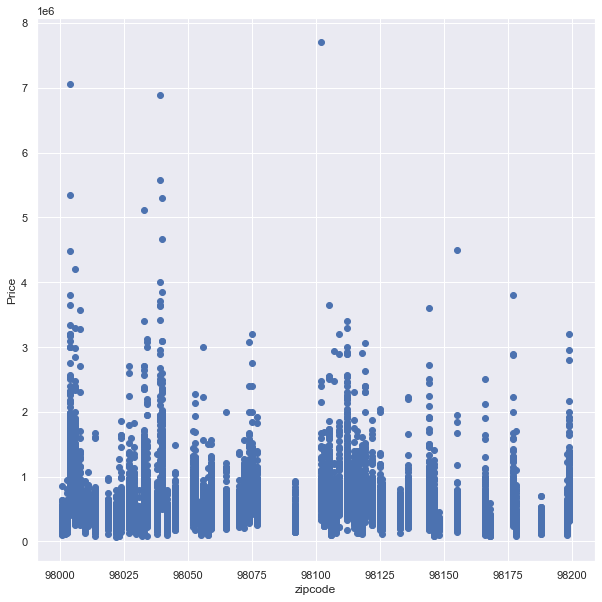

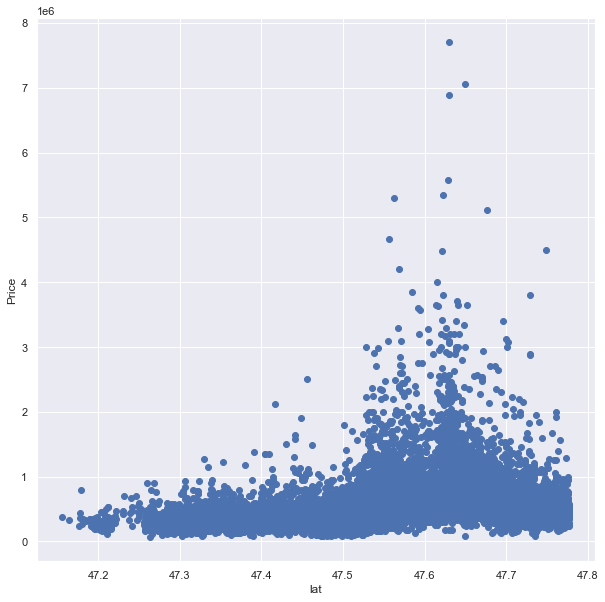

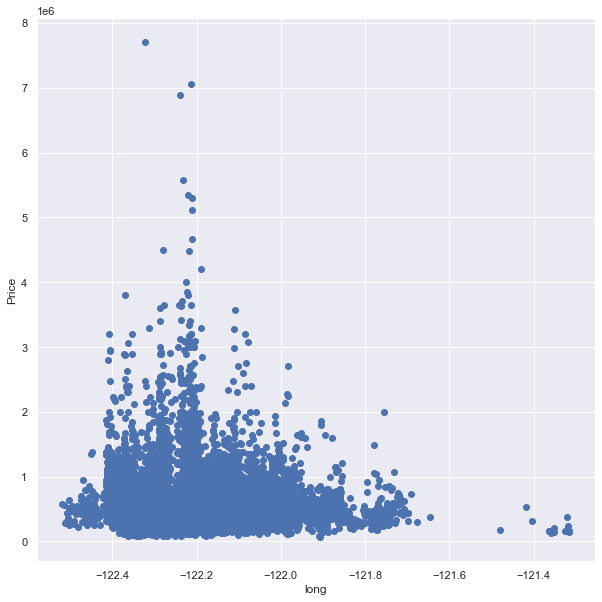

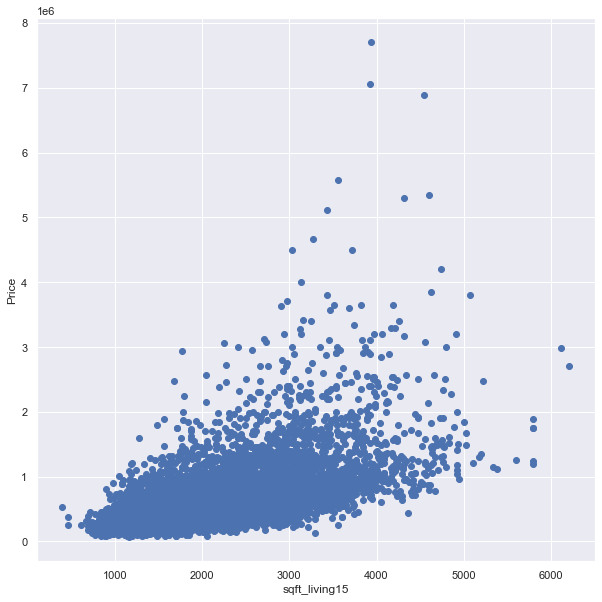

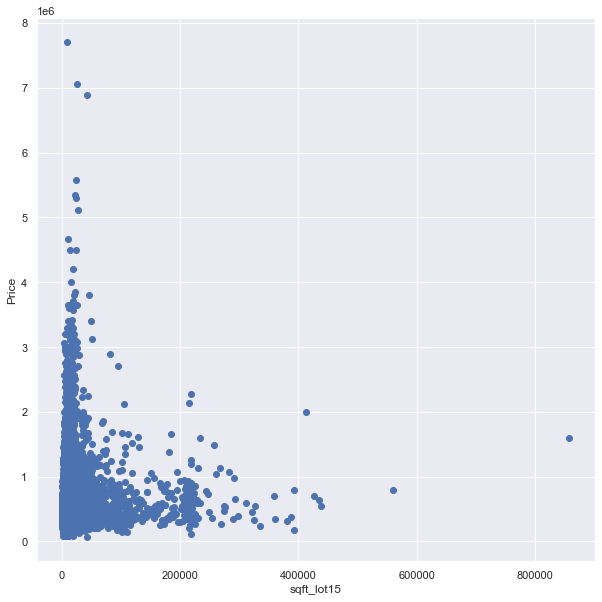

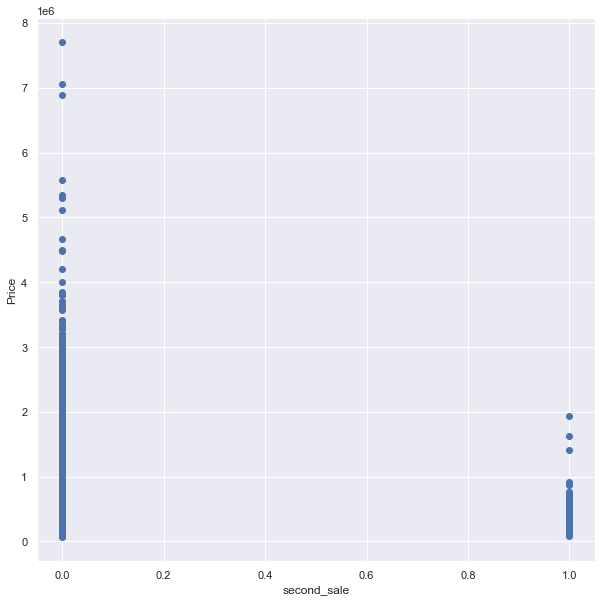

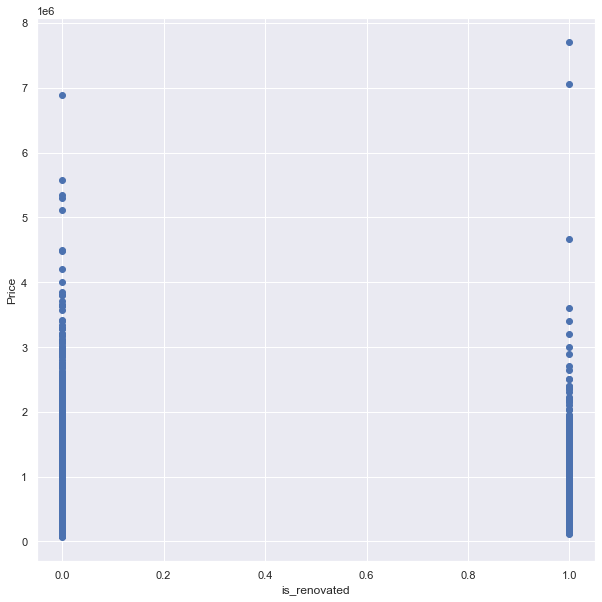

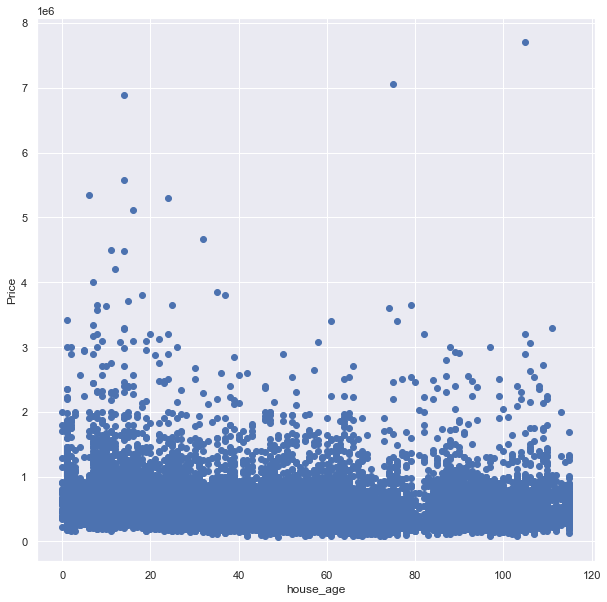

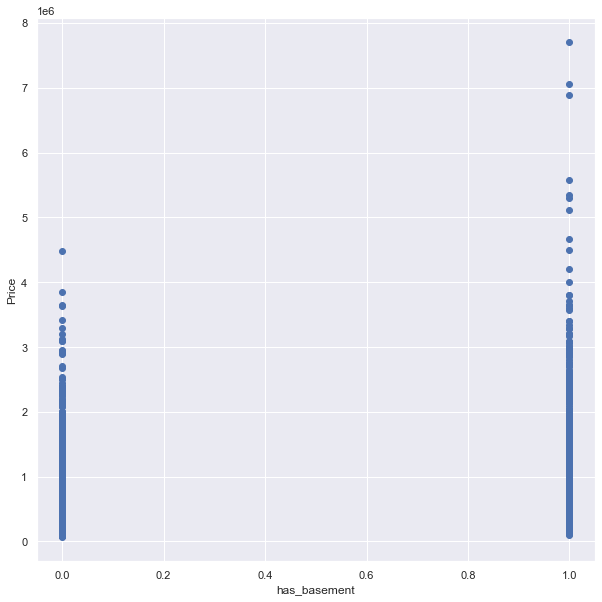

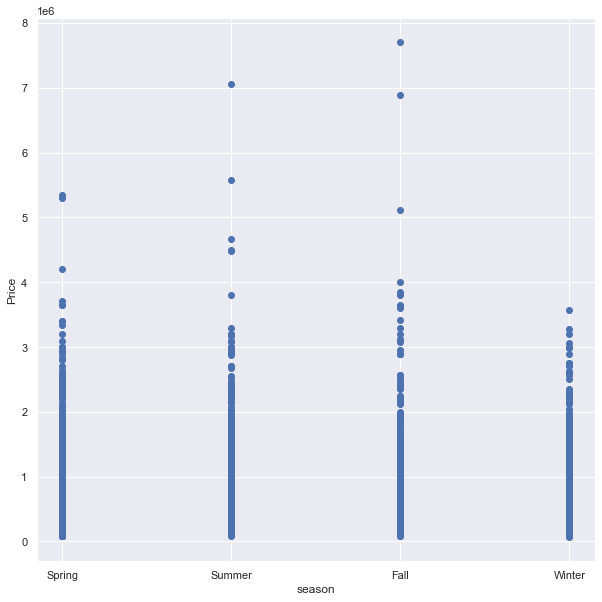

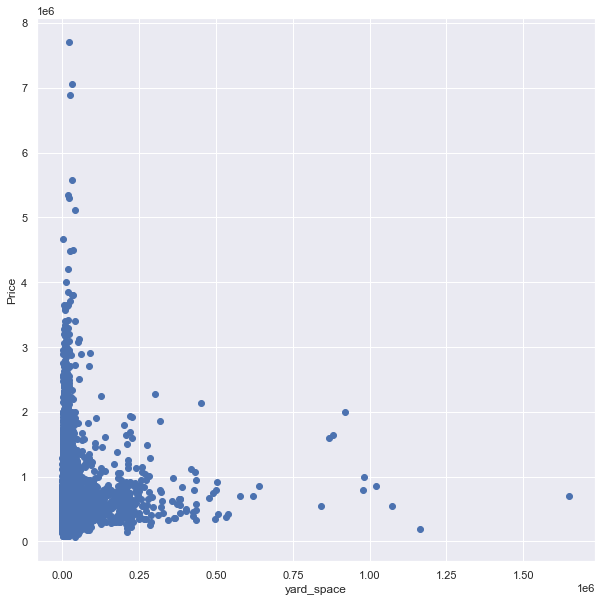

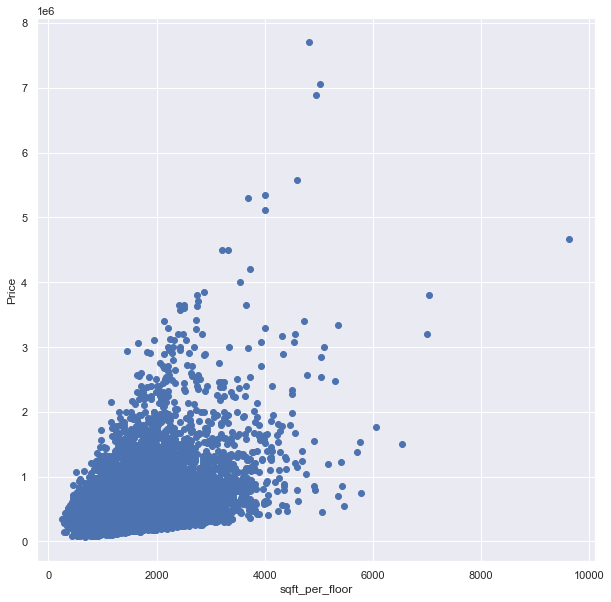

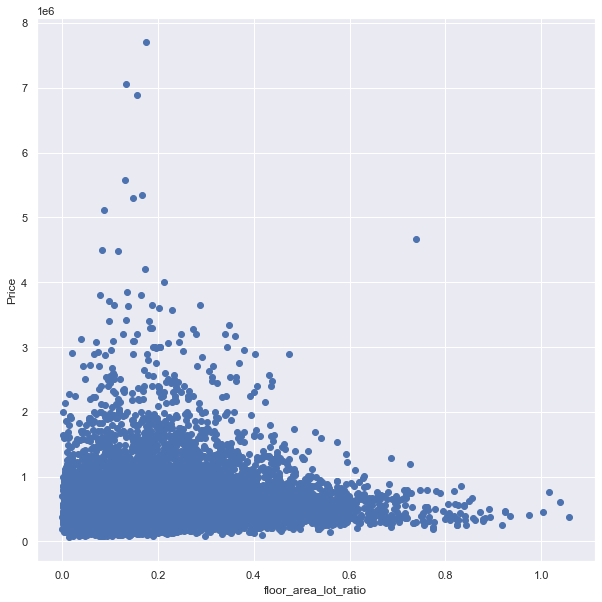

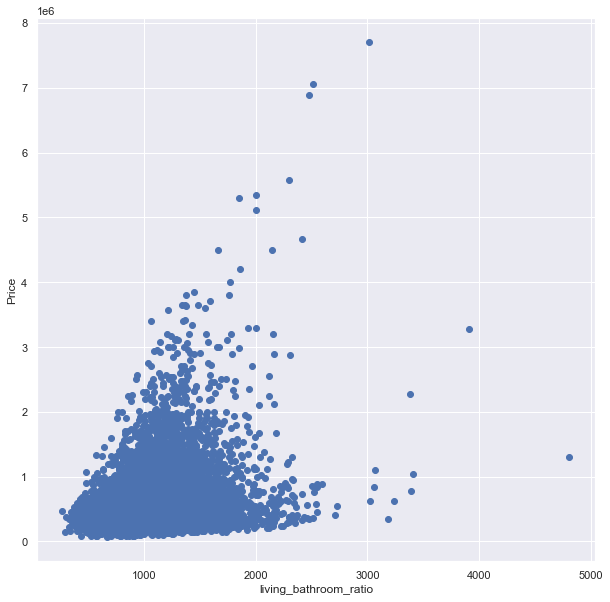

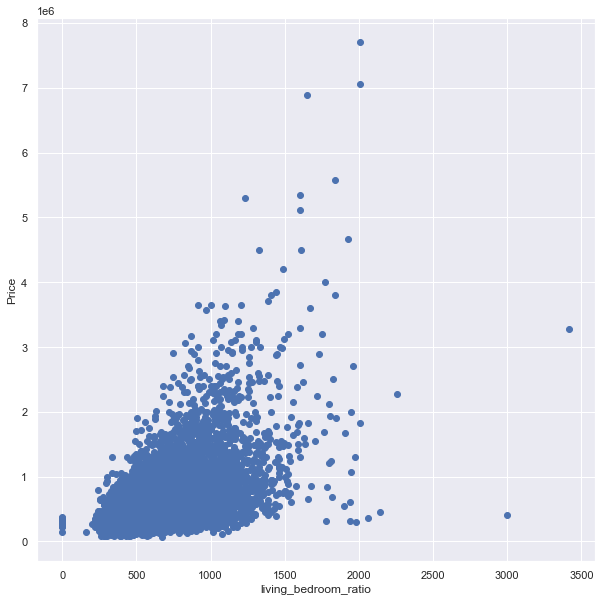

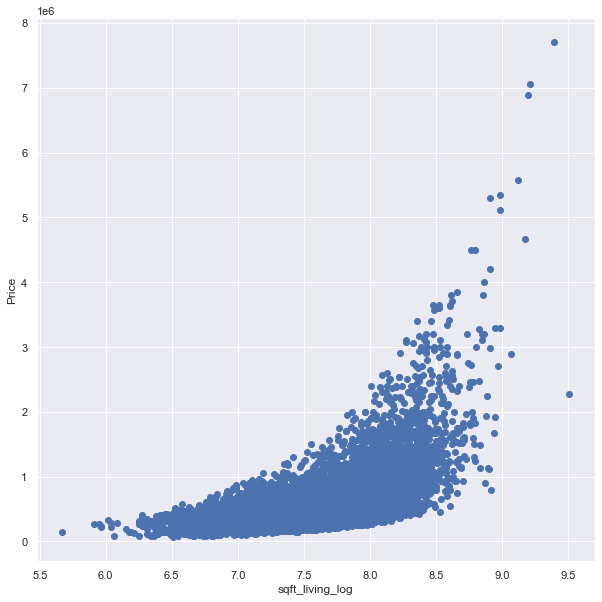

In [70]:
for x in range(df.columns.size):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(y=df.price,x=df[df.columns[x]])
    ax.set_xlabel(df.columns[x])
    ax.set_ylabel('Price')

In [71]:
df.groupby('floors').size()

floors
1.0    8606
1.5    1524
2.0    6538
2.5     140
3.0     475
3.5       7
dtype: int64

In [72]:
df['floors'] = [3 if x >= 3 else x for x in df.floors]

In [73]:
df.groupby('condition').size()

condition
1       24
2      139
3    11244
4     4516
5     1367
dtype: int64

In [74]:
df['condition'] = [2 if x <= 2 else x for x in df.condition]

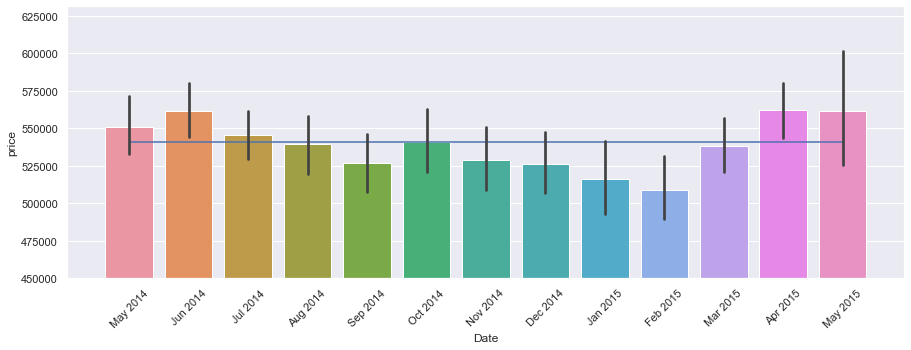

In [75]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x=df.date, y=df.price, data=df)
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(ticks=np.array(range(13)), labels=['May 2014','Jun 2014', 'Jul 2014', 'Aug 2014','Sep 2014','Oct 2014','Nov 2014', 'Dec 2014','Jan 2015','Feb 2015','Mar 2015', 'Apr 2015', 'May 2015'], rotation = 45)
plt.ylim(bottom=450000)
plt.hlines(df.price.mean(),0, 12, label="Average Price")
ax.set_xlabel('Date');

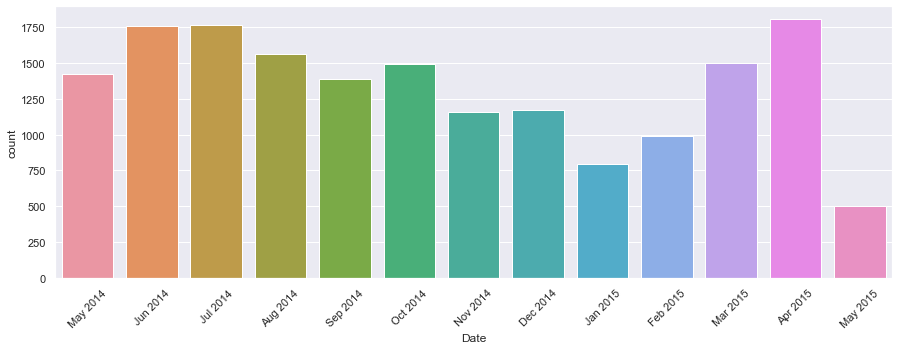

In [76]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data=df, x=df.date)
plt.xticks(ticks=np.array(range(13)), labels=['May 2014','Jun 2014', 'Jul 2014', 'Aug 2014','Sep 2014','Oct 2014','Nov 2014', 'Dec 2014','Jan 2015','Feb 2015','Mar 2015', 'Apr 2015', 'May 2015'], rotation = 45)
ax.set_xlabel('Date');


In [77]:
df.date.value_counts(sort=False)

2015-01-01     792
2014-08-01    1561
2015-03-01    1496
2014-11-01    1154
2014-06-01    1753
2014-12-01    1170
2015-02-01     990
2014-07-01    1761
2014-09-01    1388
2015-04-01    1804
2014-10-01    1493
2014-05-01    1423
2015-05-01     505
Name: date, dtype: int64

In [78]:
df['built_by_decade'] = [round(x,-1) for x in df.yr_built]

In [79]:
df.built_by_decade

0        1990
1        1990
2        1990
3        1970
4        2010
         ... 
17285    1950
17286    2000
17287    2010
17288    1940
17289    1920
Name: built_by_decade, Length: 17290, dtype: int64

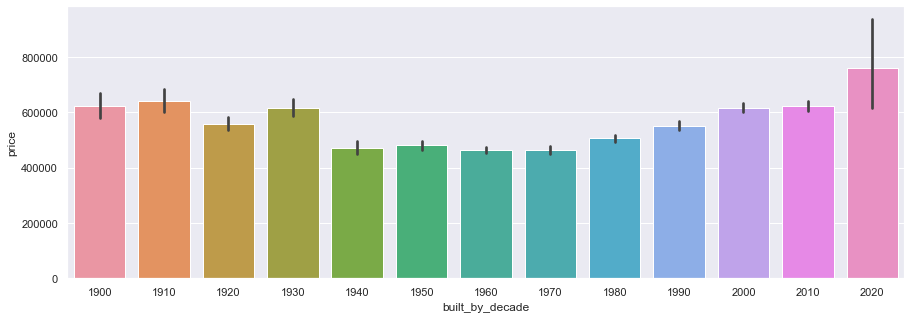

In [80]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x=df.built_by_decade, y=df.price, data=df)

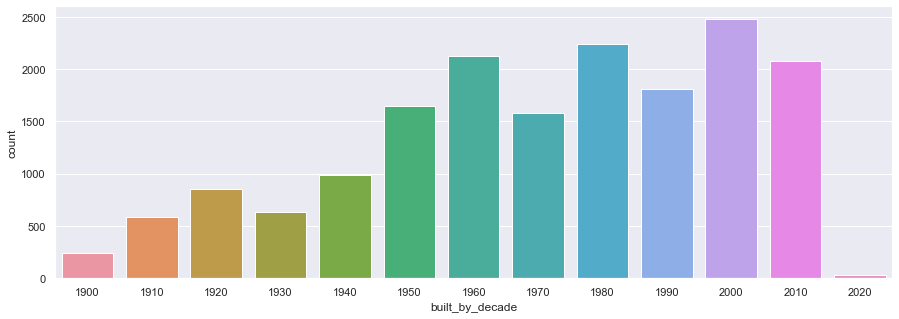

In [81]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data=df, x=df.built_by_decade)

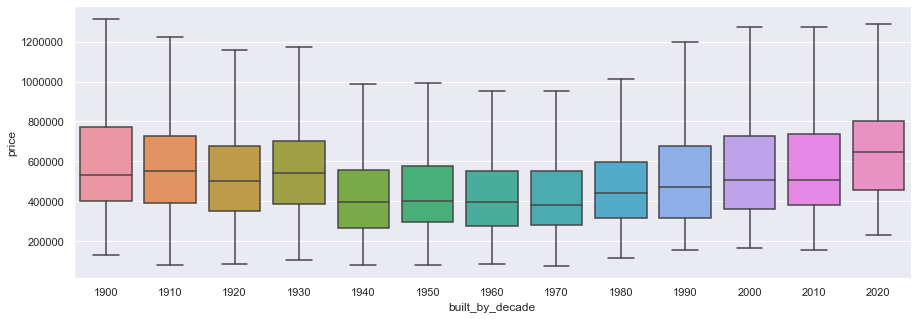

In [82]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.boxplot(data=df, x=df.built_by_decade, y=df.price, showfliers=False)
ax.ticklabel_format(style='plain', axis='y')

In [83]:
df.built_by_decade.value_counts()

2000    2475
1980    2236
1960    2123
2010    2080
1990    1810
1950    1644
1970    1576
1940     988
1920     856
1930     637
1910     590
1900     246
2020      29
Name: built_by_decade, dtype: int64

In [84]:
df['built_by_decade'] = [2010 if x >= 2020 else x for x in df.built_by_decade]

In [85]:
df['years_from_1970'] = [abs(x-1970) for x in df.built_by_decade]

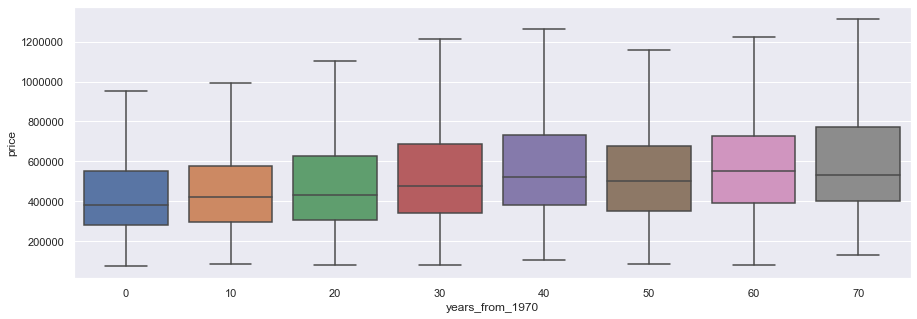

In [86]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.boxplot(data=df, x=df.years_from_1970, y=df.price, showfliers=False)
ax.ticklabel_format(style='plain', axis='y')

In [87]:
df.groupby('years_from_1970').mean().price

years_from_1970
0     463387.193528
10    485382.510209
20    517617.991604
30    575003.194629
40    624001.080845
50    558964.600467
60    641632.906780
70    624689.146341
Name: price, dtype: float64

In [88]:
ols(formula='price~C(years_from_1970)', data= df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     58.49
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           2.35e-83
Time:                        18:28:46   Log-Likelihood:            -2.4616e+05
No. Observations:               17290   AIC:                         4.923e+05
Df Residuals:                   17282   BIC:                         4.924e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 4.634e+05   9296.205     49.847      0.000    4.45e+05    4.82e+05
C(years_from_1970)[T.10]    2.2e+04   1.08e+04      2.028      0.043     733.462    4.33e+04
C(years_from_1970)[T.20]  5.423e+04   1.12e+04      4.834      0.000    3.22e+04    7.62e+04
C(years_from_1970)[T.30]  1.116e+05   1.12e+04      9.953      0.000    8.96e+04    1.34e+05
C(years_from_1970)[T.40]  1.606e+05   1.17e+04     13.772      0.000    1.38e+05    1.83e+05
C(years_from_1970)[T.50]  9.558e+04   1.57e+04      6.100      0.000    6.49e+04    1.26e+05
C(years_from_1970)[T.60]  1.782e+05   1.78e+04     10.007      0.000    1.43e+05    2.13e+05
C(years_from_1970)[T.70]  1.613e+05   2.53e+04      6.376      0.000    1.12e+05    2.11e+05
==============================================================================
Omnibus:                    16075.547   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1144902.899
Skew:                           4.296   Prob(JB):                         0.00
Kurtosis:                      41.928   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
st.f_oneway(df[df['years_from_1970']==0].price,
            df[df['years_from_1970']==10].price,
            df[df['years_from_1970']==20].price,
            df[df['years_from_1970']==30].price,
            df[df['years_from_1970']==40].price,
            df[df['years_from_1970']==50].price,
            df[df['years_from_1970']==60].price,
            df[df['years_from_1970']==70].price)

F_onewayResult(statistic=58.486834071130644, pvalue=2.351034102176135e-83)

In [90]:
ols(formula='price~C(zipcode)+sqft_living+C(waterfront)+C(grade)', data= df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     899.9
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:28:46   Log-Likelihood:            -2.3241e+05
No. Observations:               17290   AIC:                         4.650e+05
Df Residuals:                   17212   BIC:                         4.656e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -5.11e+04   1.52e+04     -3.368      0.001   -8.08e+04   -2.14e+04
C(zipcode)[T.98002]  1.259e+04   1.66e+04      0.757      0.449      -2e+04    4.52e+04
C(zipcode)[T.98003] -1368.3362   1.49e+04     -0.092      0.927   -3.06e+04    2.79e+04
C(zipcode)[T.98004]  7.964e+05   1.48e+04     53.743      0.000    7.67e+05    8.25e+05
C(zipcode)[T.98005]  3.107e+05   1.73e+04     17.951      0.000    2.77e+05    3.45e+05
C(zipcode)[T.98006]  2.844e+05   1.32e+04     21.560      0.000    2.59e+05     3.1e+05
C(zipcode)[T.98007]  2.572e+05   1.81e+04     14.220      0.000    2.22e+05    2.93e+05
C(zipcode)[T.98008]  2.819e+05   1.49e+04     18.930      0.000    2.53e+05    3.11e+05
C(zipcode)[T.98010]  6.596e+04   2.18e+04      3.025      0.002    2.32e+04    1.09e+05
C(zipcode)[T.98011]  1.307e+05   1.64e+04      7.960      0.000    9.85e+04    1.63e+05
C(zipcode)[T.98014]  1.037e+05   1.94e+04      5.354      0.000    6.57e+04    1.42e+05
C(zipcode)[T.98019]  8.456e+04    1.7e+04      4.960      0.000    5.11e+04    1.18e+05
C(zipcode)[T.98022]  4.497e+04   1.57e+04      2.869      0.004    1.42e+04    7.57e+04
C(zipcode)[T.98023] -2.938e+04   1.29e+04     -2.278      0.023   -5.47e+04   -4096.696
C(zipcode)[T.98024]  1.868e+05    2.3e+04      8.132      0.000    1.42e+05    2.32e+05
C(zipcode)[T.98027]  1.639e+05   1.35e+04     12.101      0.000    1.37e+05     1.9e+05
C(zipcode)[T.98028]  1.355e+05    1.5e+04      9.017      0.000    1.06e+05    1.65e+05
C(zipcode)[T.98029]  2.121e+05   1.46e+04     14.540      0.000    1.84e+05    2.41e+05
C(zipcode)[T.98030]   -55.6580   1.54e+04     -0.004      0.997   -3.02e+04    3.01e+04
C(zipcode)[T.98031]  1.462e+04   1.51e+04      0.969      0.333    -1.5e+04    4.42e+04
C(zipcode)[T.98032]  1.342e+04   1.92e+04      0.699      0.485   -2.42e+04    5.11e+04
C(zipcode)[T.98033]  3.678e+05   1.33e+04     27.585      0.000    3.42e+05    3.94e+05
C(zipcode)[T.98034]  2.064e+05   1.27e+04     16.195      0.000    1.81e+05    2.31e+05
C(zipcode)[T.98038]  2.951e+04   1.26e+04      2.336      0.020    4747.581    5.43e+04
C(zipcode)[T.98039]  1.301e+06   2.79e+04     46.703      0.000    1.25e+06    1.36e+06
C(zipcode)[T.98040]  5.151e+05    1.5e+04     34.342      0.000    4.86e+05    5.45e+05
C(zipcode)[T.98042]  1.401e+04   1.28e+04      1.094      0.274   -1.11e+04    3.91e+04
C(zipcode)[T.98045]  1.103e+05    1.6e+04      6.885      0.000    7.89e+04    1.42e+05
C(zipcode)[T.98052]  2.338e+05   1.26e+04     18.576      0.000    2.09e+05    2.59e+05
C(zipcode)[T.98053]  2.017e+05   1.36e+04     14.799      0.000    1.75e+05    2.28e+05
C(zipcode)[T.98055]  4.564e+04   1.52e+04      3.003      0.003    1.59e+04    7.54e+04
C(zipcode)[T.98056]  9.879e+04   1.35e+04      7.333      0.000    7.24e+04    1.25e+05
C(z

In [91]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,is_renovated,house_age,has_basement,season,yard_space,sqft_per_floor,floor_area_lot_ratio,living_bathroom_ratio,living_bedroom_ratio,sqft_living_log,built_by_decade,years_from_1970
0,2014-05-01,257950.0,3,1.75,1370,5858,1.0,0,0,3,7,1370,0,1987,0,98198,47.3815,-122.313,1400,7500,0,0,28,0,Spring,4488.0,1370.0,0.233868,782.857143,456.666667,7.222566,1990,20
1,2014-05-01,439950.0,3,2.50,1770,2875,2.0,0,0,3,8,1770,0,1990,0,98116,47.5631,-122.397,1770,3833,0,0,25,0,Spring,1990.0,885.0,0.307826,708.000000,590.000000,7.478735,1990,20
2,2014-05-01,287200.0,3,3.00,1850,19966,1.0,0,0,4,7,1090,760,1992,0,98038,47.3493,-122.034,1410,6715,0,0,23,1,Spring,18116.0,1850.0,0.092658,616.666667,616.666667,7.522941,1990,20
3,2014-05-01,260000.0,4,2.00,1480,8625,1.0,0,0,4,7,1480,0,1974,0,98055,47.4620,-122.193,2130,8502,0,0,41,0,Spring,7145.0,1480.0,0.171594,740.000000,370.000000,7.299797,1970,0
4,2014-05-01,459990.0,3,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4761,-121.734,2990,6037,0,0,2,0,Spring,4199.0,1340.0,0.241921,1072.000000,893.333333,7.893572,2010,40


### Creating dummy variables and dropping columns with either multicollinearity or no significance according to the previous heatmap and linear regression testing to prepare for multi_linear regression modeling

In [92]:
df = pd.get_dummies(df, columns =['zipcode', 'grade', 'years_from_1970', 'bedrooms', 'bathrooms', 'date', 'floors', 'waterfront', 'view', 'condition', 'built_by_decade','season'], drop_first=True)

In [93]:
df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       ...
       'built_by_decade_1950', 'built_by_decade_1960', 'built_by_decade_1970',
       'built_by_decade_1980', 'built_by_decade_1990', 'built_by_decade_2000',
       'built_by_decade_2010', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object', length=158)

In [94]:
df.drop(['zipcode_98002', 'zipcode_98003', 'zipcode_98030', 'zipcode_98031','zipcode_98032',  'zipcode_98042', 'zipcode_98092', 'zipcode_98188', 'zipcode_98198'], axis=1, inplace=True)

In [95]:
target=df['price']
df_features = df.drop(['price', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)

In [96]:
df_features.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'second_sale', 'is_renovated',
       'house_age', 'has_basement', 'yard_space', 'sqft_per_floor',
       'floor_area_lot_ratio',
       ...
       'built_by_decade_1950', 'built_by_decade_1960', 'built_by_decade_1970',
       'built_by_decade_1980', 'built_by_decade_1990', 'built_by_decade_2000',
       'built_by_decade_2010', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object', length=141)

### First model has is simple, just has most of the features 

In [97]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=1,test_size=.3)

In [98]:
lm = LinearRegression()

In [99]:
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)
print ("R^2 Score:", lm.score(X_train, y_train))

2738033.2375017605
[ 3.00233227e+02  2.45472543e+03  4.31387682e+01 -1.06760237e+04
  6.50980301e+04 -1.48993263e+03  9.82605470e+03 -2.45467707e+03
 -2.48341646e+03 -1.79501283e+05  3.66090747e+01  1.08337103e+02
 -4.25393435e+05  7.96871766e+05  2.94626569e+05  2.59167608e+05
  2.74922101e+05  2.60443729e+05  6.69161217e+04  1.49174105e+05
  8.92925982e+04  8.73406469e+04 -8.36976815e+03 -2.56343352e+04
  1.36273224e+05  1.67178918e+05  1.38314568e+05  2.30789607e+05
  3.52118069e+05  2.05050188e+05  3.30788405e+04  1.24259821e+06
  4.93501271e+05  8.19092958e+04  2.52918636e+05  1.99297169e+05
  5.35662665e+04  9.24937629e+04  3.95405968e+04  7.50150428e+04
  9.27855165e+04  1.42579766e+04  1.61425206e+05  1.88340263e+05
  1.79753962e+05  1.09968317e+05  5.63376506e+05  3.69434279e+05
  5.05626192e+05  1.17938009e+05  3.79867265e+05  1.35135877e+05
  5.17641325e+05  6.49610240e+05  3.52335171e+05  3.01542535e+05
  3.40224254e+05  1.76654658e+05  5.18609511e+05  3.76636483e+05
  2.07

In [100]:
y_train_pred = lm.predict(X_train)

In [101]:
y_train_pred

array([ 259749.18194139,  291592.74811495, 1112946.06758742, ...,
        388145.99120065,  330342.34602687, 1041145.19423999])

In [102]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 89656.83089853007
Mean Squared Error: 23977043875.5212
Root Mean Squared Error: 154845.22554964747


In [103]:
y_pred = lm.predict(X_test)

In [104]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.8417179466219264


In [105]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:87696.28248617749
Mean Squared Error:21676756576.25563
Root Mean Squared Error:147230.28416822277


In [106]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  154845 vs. Testing:  147230


### The varience between the RMSE of Training and Testing doesn't seem too extreme

In [107]:
residuals = (y_test- y_pred)

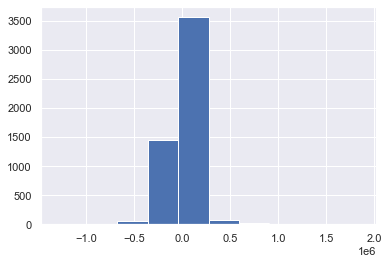

In [108]:
plt.hist(residuals);


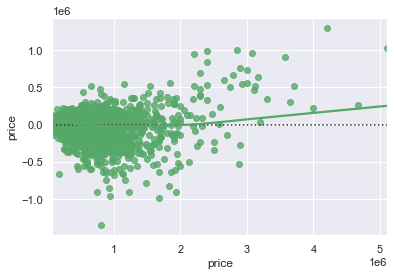

In [109]:
sns.residplot(x=y_test, y=residuals, lowess=True, color="g");

### After plotting the residuals I can see heteroscedasticity, and a non_normal distribution of errors.

### In the next model I try using the log of price to better account for outliers in price.

In [110]:
lm_log_model = LinearRegression()

In [111]:
y_log_train = np.log(y_train)
lm_log_model.fit(X_train, y_log_train)

LinearRegression()

In [112]:
y_log_train_preds = lm_log_model.predict(X_train)
y_log_train_preds = np.exp(y_log_train_preds)

log_train_mae = metrics.mean_absolute_error(y_train, y_log_train_preds)
log_train_mse = metrics.mean_squared_error(y_train, y_log_train_preds)
log_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_log_train_preds))

In [113]:
y_log_test_preds = lm_log_model.predict(X_test)
y_log_test_preds = np.exp(y_log_test_preds)

log_test_mae = metrics.mean_absolute_error(y_test, y_log_test_preds)
log_test_mse = metrics.mean_squared_error(y_test, y_log_test_preds)
log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_log_test_preds))

In [114]:
log_train_rmse, log_test_rmse

(126121.2853488154, 127338.51682085355)

### The Varience in RMSE between training and testing seem really low as well and the RMSE itself

In [115]:
residuals = (y_test - y_log_test_preds)

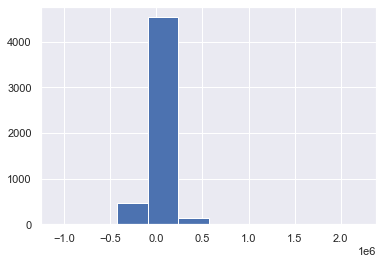

In [116]:
plt.hist(residuals);

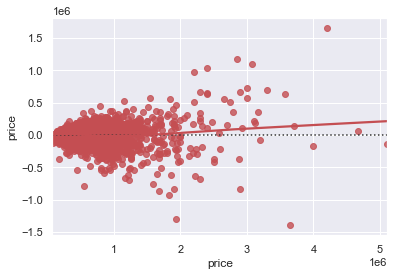

In [117]:
sns.residplot(x=y_test, y=residuals, lowess=True, color='r');

### After Plotting the residuals, the distribution of errors is more normal but the heteroscadasticity seems much more larger

### In the model below I go through all the features and drop the features with a correaltion to another feature that's greater than .90, in a effert to see if less multicollinearity will improve the model

In [118]:
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [119]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

X_train_corr = X_train.drop(columns=to_drop, inplace=False, axis=1)
X_test_corr = X_test.drop(columns=to_drop, inplace=False, axis=1)

In [120]:
len(to_drop)

4

In [121]:
to_drop

['yard_space',
 'sqft_living_log',
 'built_by_decade_1910',
 'built_by_decade_1920']

In [122]:
lnAll_corr_log = LinearRegression()

y_log_train = np.log(y_train)
lnAll_corr_log.fit(X_train_corr, y_log_train)

y_log_train_preds = lnAll_corr_log.predict(X_train_corr)
y_log_train_preds = np.exp(y_log_train_preds)

log_train_mae = metrics.mean_absolute_error(y_train, y_log_train_preds)
log_train_mse = metrics.mean_squared_error(y_train, y_log_train_preds)
log_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_log_train_preds))

y_log_test_preds = lnAll_corr_log.predict(X_test_corr)

y_log_test_preds = np.exp(y_log_test_preds)

log_test_mae = metrics.mean_absolute_error(y_test, y_log_test_preds)
log_test_mse = metrics.mean_squared_error(y_test, y_log_test_preds)
log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_log_test_preds))

log_train_rmse, log_test_rmse

(130114.21161054293, 128763.69850197485)

### The varience in RMSE seems low but the RMSE itself is a little higher than the previous model

In [123]:
residuals = (y_test - y_log_test_preds)

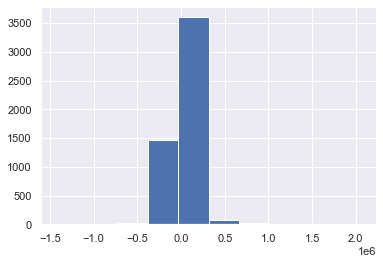

In [124]:
plt.hist(residuals);

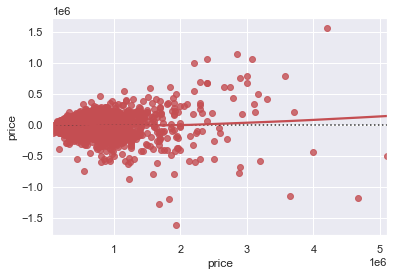

In [125]:
sns.residplot(x=y_test, y=residuals, lowess=True, color='r');

### looking the graphs, the errors still aren't too normally distributed and the heteroscedasticity seems as bad as the previous model

### In the next model, I use Recursive Feature Elimination to choose the worst performing features in the model and I remove them

In [126]:
ols = LinearRegression()

selector = RFECV(estimator=ols, step=2, cv=7, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

 
selector.fit(X_train, y_train)

Fitting estimator with 141 features.
Fitting estimator with 139 features.


RFECV(cv=7, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error', step=2, verbose=1)

In [127]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [128]:
X_train_rfe = X_train.drop(columns=removed_rfe, inplace=False, axis=1)
X_test_rfe = X_test.drop(columns=removed_rfe, inplace=False, axis=1)

In [129]:
lm_rfe = LinearRegression()

lm_rfe = lm_rfe.fit(X_train_rfe, y_train)

y_rfe = lm_rfe.predict(X_train_rfe)

trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test_rfe)

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)



Training Root Mean Squared Error: 165990.2588490585
Testing Root Mean Squared Error: 152137.0700045921


In [130]:
removed_rfe

Index(['sqft_living', 'sqft_above', 'living_bathroom_ratio',
       'living_bedroom_ratio'],
      dtype='object')

### RFE removed 4 features from the model but the varience is much higher and the RMSE is much higher as well

In [131]:
residuals = (y_test - y_pred_rfe)

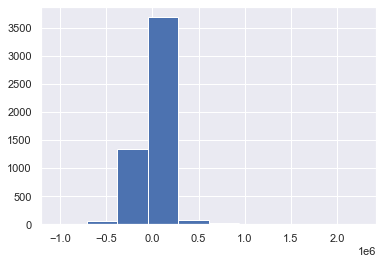

In [132]:
plt.hist(residuals);

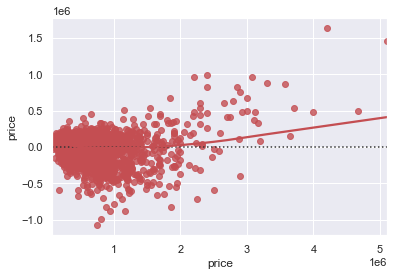

In [133]:
sns.residplot(x=y_test, y=residuals, lowess=True, color='r');

### Looking at the graph I can see that the errors are less normally distributed than before and our heteroscadasticity is still there

### After testing I decide to choose the model with the lowest varience in RMSE, which in the model that only took the log of the price and all features to make th prediction

In [134]:
columns = X_train.columns

In [135]:
len(columns)

141

In [136]:
final_model = LinearRegression()

In [137]:
log_price = np.log(df.price)
final_model.fit(df[columns], log_price)

LinearRegression()

### I create my final model and pickle it along with the feature names I used

In [138]:
pickle_out = open("model.pickle","wb")
pickle.dump(final_model, pickle_out)
pickle_out.close()


pickle_out = open("columns.pickle","wb")
pickle.dump(columns, pickle_out)
pickle_out.close()
